# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Importing warnings module to suppress specific types of warnings
import warnings

# Suppressing specific types of warnings for cleaner output
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build models for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score
from sklearn import metrics

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


## Data Overview

- Observations
- Sanity checks

In [2]:
# Load the data frame to the IDE. 
Learn_df = pd.read_csv('ExtraaLearn.csv')

In [3]:
# Display the first five rows of the data frame 'Learn_df'.
Learn_df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [4]:
# Display the last five rows of the data frame 'Learn_df'
Learn_df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [5]:
'''
"dataframe.shape" in Pandas returns a tuple (a,b)that gives the dimensions of the data frame
 (a,b)= (number of rows, number of columns)
'''

print(Learn_df.shape) # Print the number of rows and columns in the data frame

print('_'*55)   # Print separator line

#Print the message indicating the number of rows and columns.
print('There are',Learn_df.shape[0],'rows and',Learn_df.shape[1],'columns present in the data.')

(4612, 15)
_______________________________________________________
There are 4612 rows and 15 columns present in the data.


In [6]:
# Check and print the number of duplicated data.

duplicate = Learn_df.duplicated().sum()

print('There is', duplicate, ' duplicate in the data.') 

There is 0  duplicate in the data.


In [7]:
# Display information about the type, structure, and characteristics of data in the data frame 'Learn_df'
Learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

***There are no missing values in the data.***

There are **4612 rows and 15 columns or features** in the data. The features **'ages', website_visits', time_spent_on_website, and status** are of type int64.
The feature **'page_views_per_visit'** is of type float64. The rest of the features are of type object. 

In [8]:
# Let's check the number of unique values in each column
Learn_df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

* Each value of the column 'ID' is a unique identifier for a lead. Hence we can drop this column as it will not add any predictive power or value to the model.
* The columns 'time_spent_on_website' and 'page_views_per_visit' have a lot of unique value. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [9]:
"""
The method describe() generates descriptive statistics such as count, mean value, standard deviation, 
min value, 25th percentile, 50th percentile, 75th percentile, and max value 
"""

# Display descriptive statistics for all columns (count, mean, std, min, 25%, 50%, 75%, and max)
Learn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [10]:
# Display descriptive statistics for all columns (count, mean, std, min, 25%, 50%, 75%, and max)
Learn_df.describe(include = 'object').T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


**The descriptive statistics of the features in the data frame lead to the following observations**

* The minimum age of the leads is 18 and the maximum is 63, with 50% of leads above the age of 51. This suggests a distribution skewed to the left.
* The feature 'website_visits' averages at ~3.57 with 75% of values below 5, and a max value at 30. This suggests possible outliers.
* The feature 'time_spent_on_website' averages at ~724 with 75 % of values below ~1337, and a max value at 2537. This suggests possible outliers.

**The descriptive statistics of the features of type object in the data frame lead to the following observations**

* All features of type object except 'ID' have a dominant value, a value with a frequency of at least 2264. 

### Univariable Analysis 

* We will visualize the distribution of each feature in the data to build a general understanding of possible trends and outliers in the data. 

In [11]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    Parameters:
    - data: dataFrame
    - feature: dataFrame column
    - figsize: size of figure (default (12,7))
    - kde: whether to the show density curve (default False)
    - bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

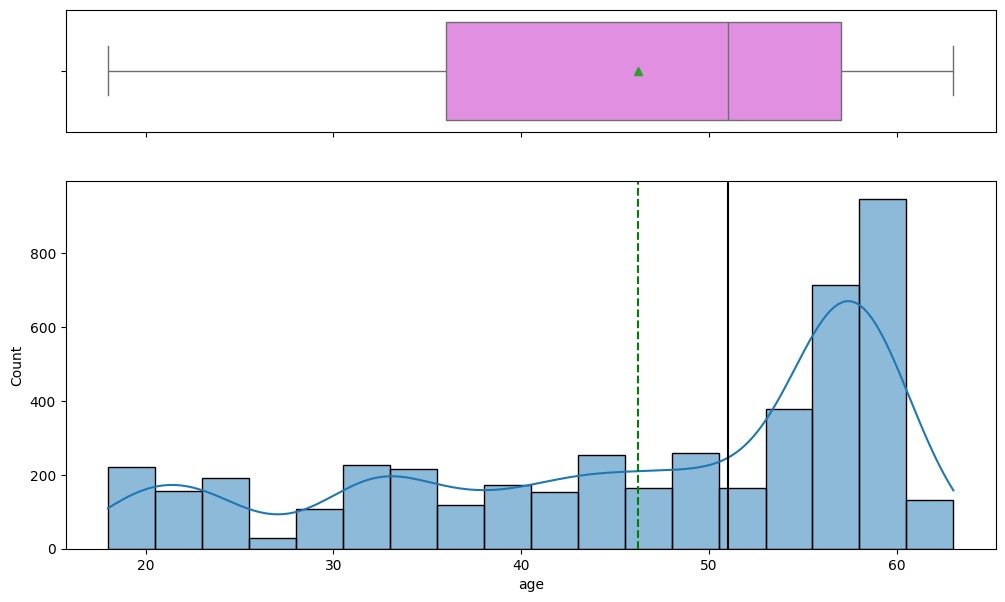

In [12]:
histogram_boxplot(Learn_df, 'age')

**The distribution of age is skewed to the left. There is huge concentration of lead with age ranging from 51 to 63. The mode is around 60**.  

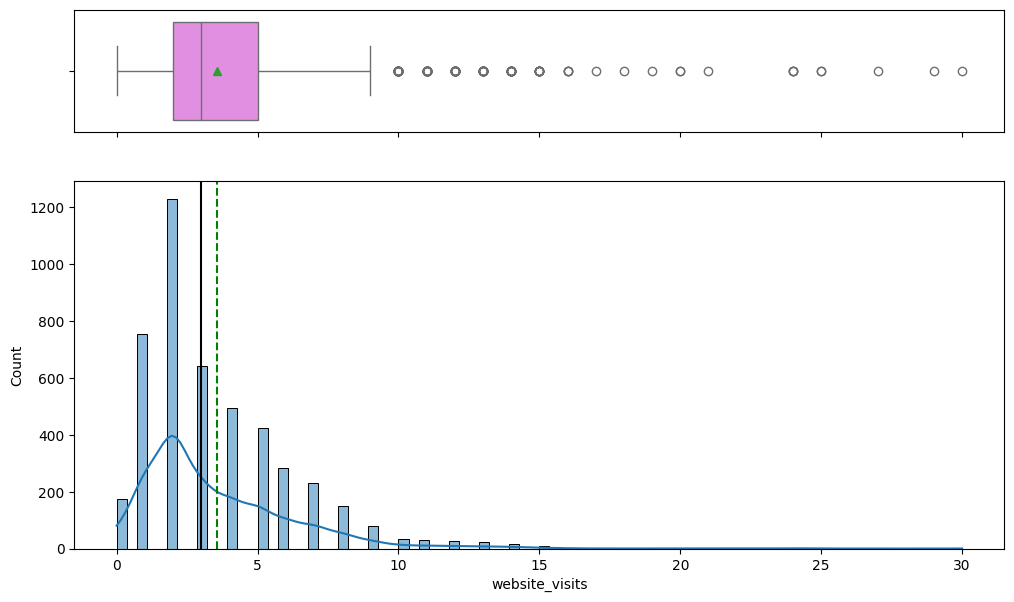

In [13]:
histogram_boxplot(Learn_df, 'website_visits')

**The distribution of feature website_visits that is the number of  times a lead visited the website is skewed to the right. There are outliers, however, they don't seem to be bad data that are totally off the chart**.  

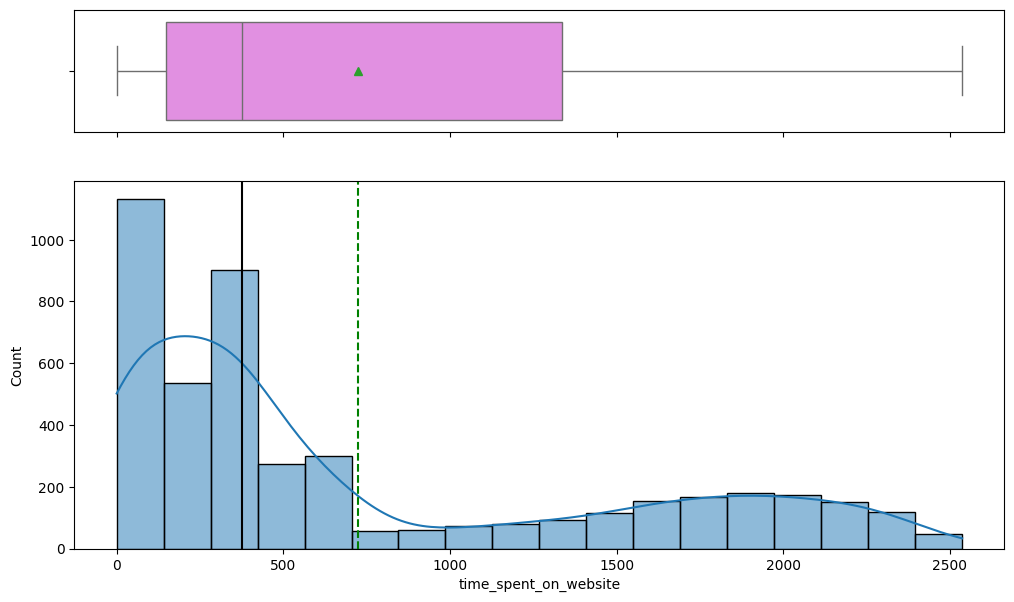

In [14]:
histogram_boxplot(Learn_df, 'time_spent_on_website')

**The distribution of feature time_spent_on_website is skewed to the right with no outliers**.

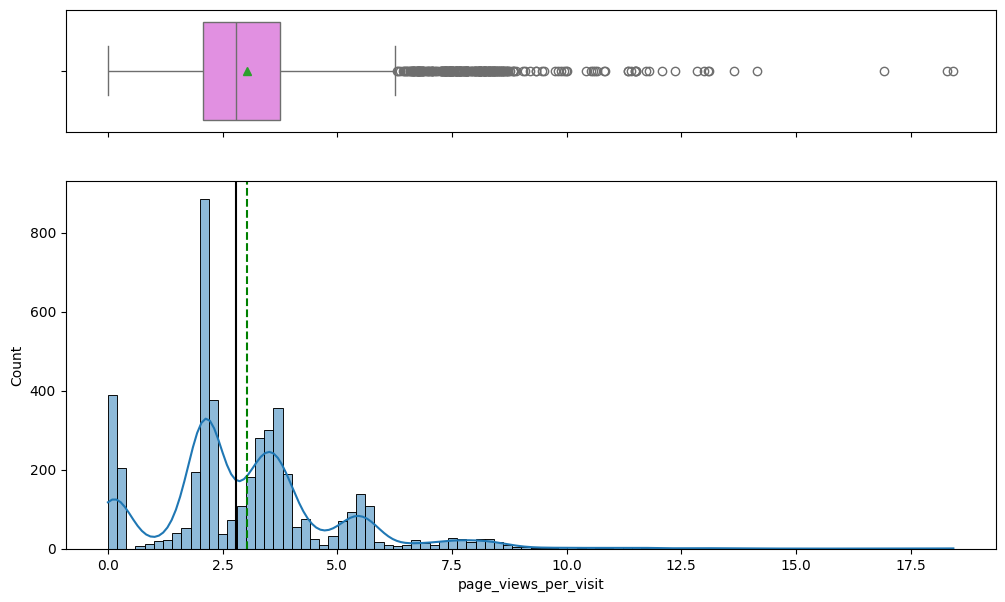

In [15]:
histogram_boxplot(Learn_df, 'page_views_per_visit')

**The distribution of feature page_views_per_visit is multimodal, and has outliers**.

status
0    3235
1    1377
Name: count, dtype: int64


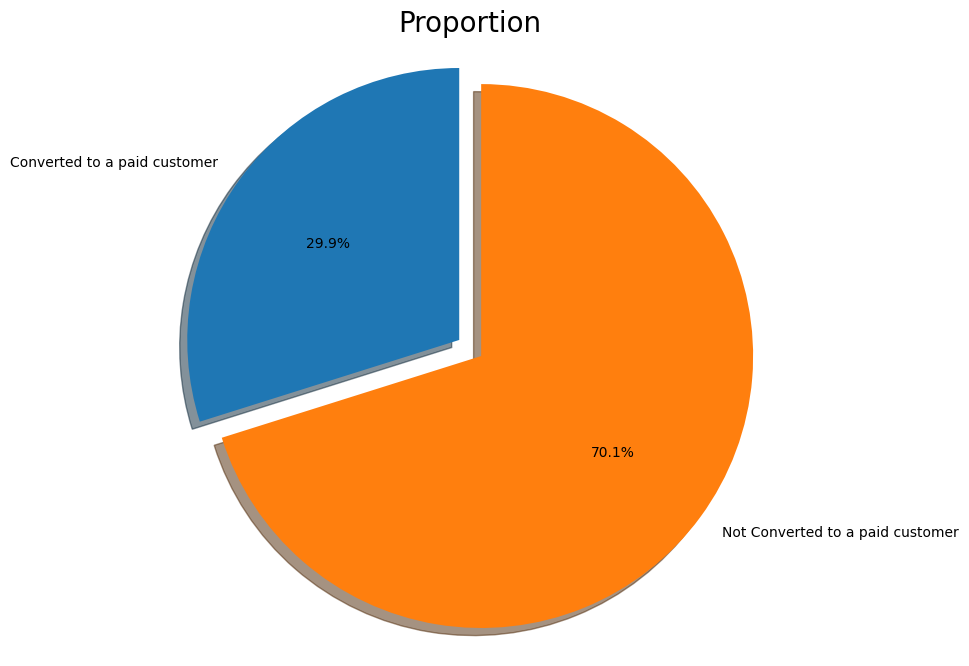

In [16]:
'''
Display a pie chart with the proportions of values in the Target's column, that's column 'status'.
'''

# Print value counts of the 'status' column
print(Learn_df['status'].value_counts())

# Define labels and sizes for the pie chart to represent the proportion of the values in the column 'status'
labels = ['Converted to a paid customer', 'Not Converted to a paid customer']
sizes = [Learn_df['status'].eq(1).sum(), Learn_df['status'].eq(0).sum()]

# Define explode for the pie chart
explode = (0, 0.1)

# Create pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Proportion", size=20)
plt.show()


**There are 3235 or 70.1% of leads not converted to paid customers whereas the remaining 1377 or 29.9% are converted paid customers.**

This pie chart shows that the distribution of classes is itself imbalanced for the target variable.
Roughly ~70.1% of leads in this dataset are not converted to paid customers.
Hence, this dataset and problem statement represent an example of imbalanced classification, which has unique challenges in comparison to performing classification over balanced target variables.

In [17]:
# Create a summary count of the variable in the categorical features of the DataFrame.
# Identify categorical columns in the DataFrame
cat_cols = Learn_df.select_dtypes(include=['object']).columns.tolist()

# Printing the count subcategories of each category.
for i in cat_cols:

    print(Learn_df[i].value_counts(normalize = False))

    print('*' * 40)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
****************************************
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
****************************************
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
****************************************
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
****************************************
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
****************************************
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
****************************************
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
**************************************

**The summary count of the variable in the categorical features of the DataFrame confirms the observation from the descriptive statistics we ran earlier**.

* That all features of type object except 'ID' have a dominant value, a value with a frequency of at least 2264.

### Bivariate Analysis

**We will represent the following relationships**

* Relationship between current_occupation and status
* Relationship between first_interaction and status
* Relationship between first_interaction/email/phone/website activity and status.
* Relationship between the group media (print media type 1&2, digital media, educational_channel, and referrals) and status.
* Relationship between 'profile_completed and status to check if it increases the chance of converting leads to paid customers. 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_wrt_target(data, predictor, target):
    """
    Plot distributions with respect to the target variable.

    Parameters:
        - data: DataFrame containing predictor and target variables.
        - predictor: Name of the predictor variable (column).
        - target: Name of the target variable (column).
    """

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get unique values of the target variable
    target_uniq = data[target].unique()

    # Iterate over unique target values
    for i, val in enumerate(target_uniq):
        # Calculate row and column indices for subplot
        row = i // 2
        col = i % 2

        # Set title for each subplot
        axs[row, col].set_title("Distribution of " + predictor + " for " + target + "=" + str(val))

        # Plot histogram for the current target value
        sns.histplot(
            data=data[data[target] == val],
            x=predictor,
            kde=True, 
            color="teal" if i == 0 else "orange",
            ax=axs[row, col]
        )

    # Plot boxplots
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target)

    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t " + target)

    # Adjust layout for better visualization
    plt.tight_layout()
    # Display the plot
    plt.show()


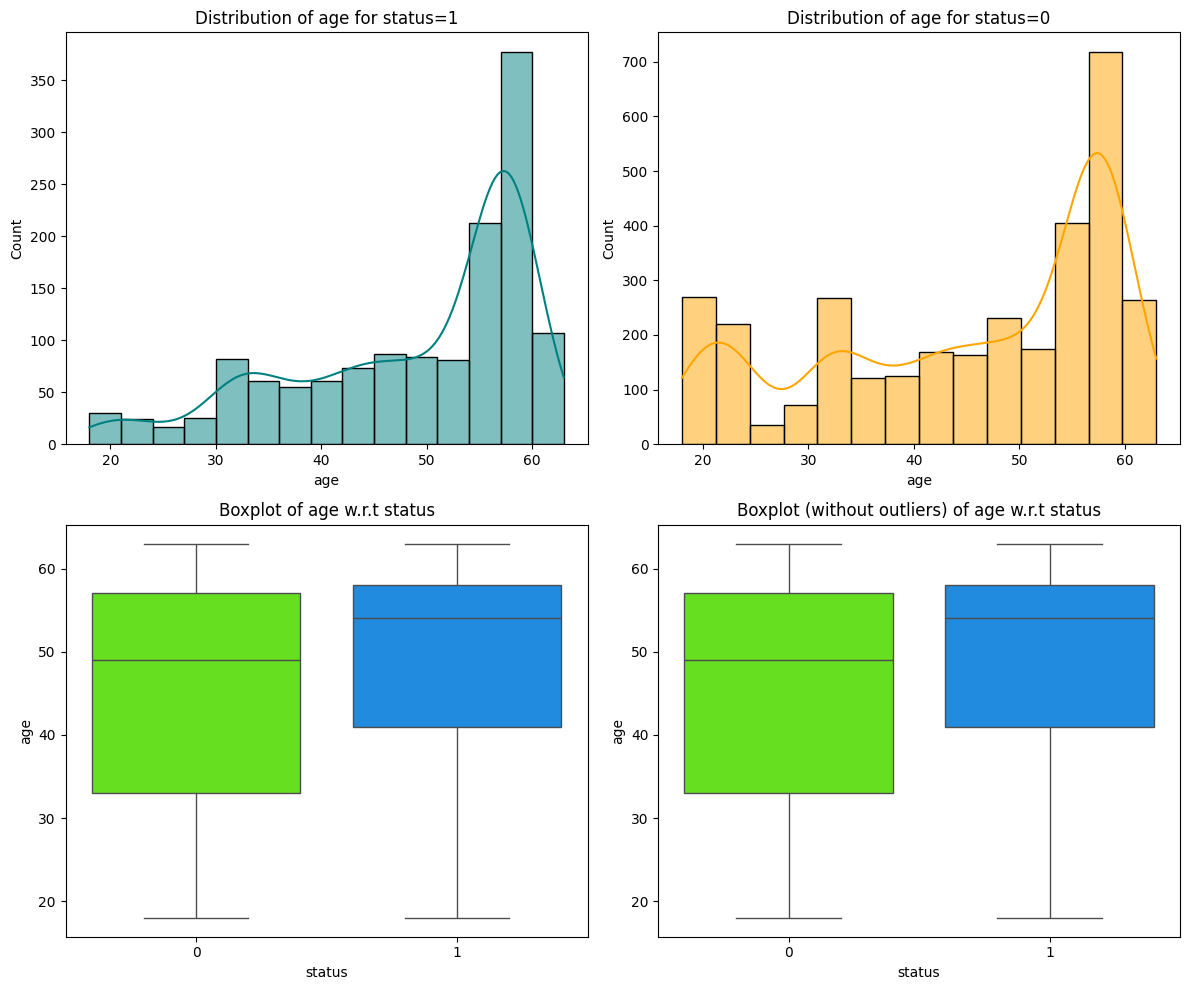

In [19]:
# Display the histogram and boxplot between age and status
distribution_plot_wrt_target(Learn_df, 'age', 'status')

The feature 'age' has no outliers. **The plot shows that the distribution of the leads' ages across the status is similar in shape but not in number. The boxplots show that the mean age of leads converted to paid customers is higher than the mean age of the leads not converted.** 

`'This could correspond to a lead segment of professionals because they are likely older`'.

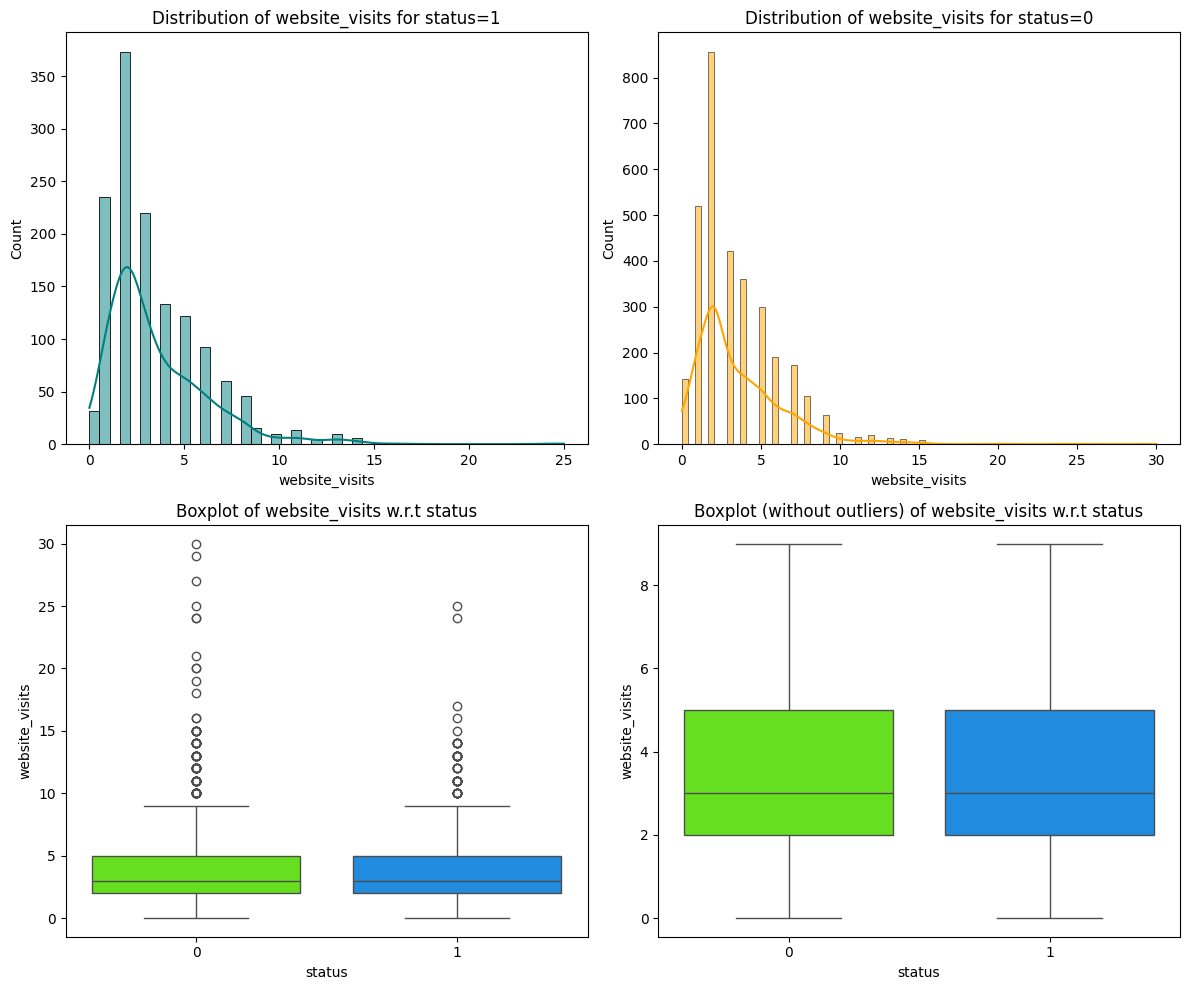

In [20]:
# Display the histogram and boxplot between current_occupation and status
distribution_plot_wrt_target(Learn_df, 'website_visits', 'status')

**The number of times a lead visits the website doesn't seem to have an impact on the status of the lead**. 

* There is no change in the shape of the distribution of data for the features `'website_visits`' and `'status=1`' compared to `'website_visits`' and `'status=0`'.
* Also, boxplots of the `'website_visits`' against the `'status`' show that **the mean of times a lead has visited the website is the same regardless of the leads' status (converted to a paid customer or not)**.  

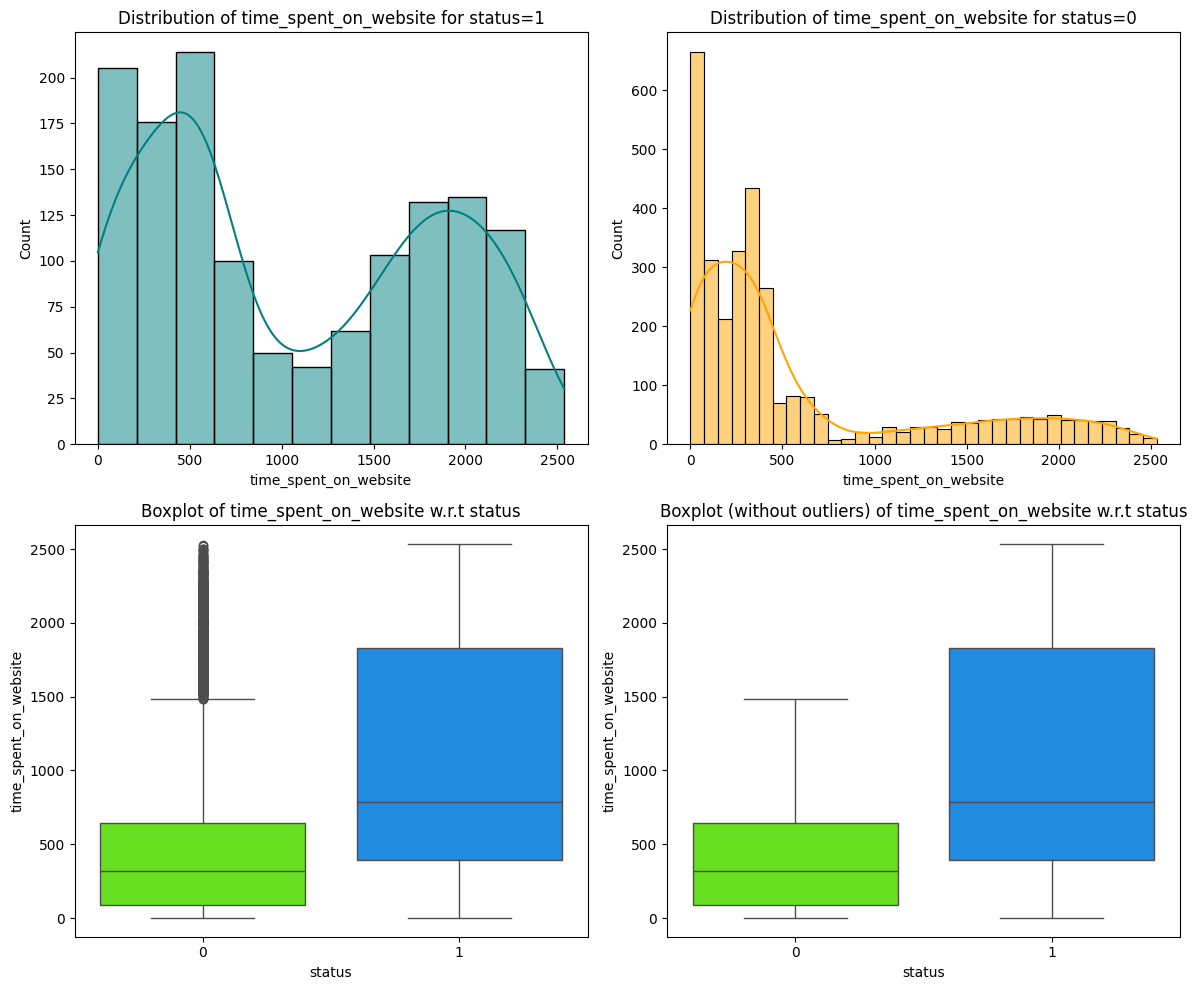

In [21]:
# Display the histogram and boxplot between time_spent_on_website and status
distribution_plot_wrt_target(Learn_df, 'time_spent_on_website', 'status')

We observe that **the window between approximately 700 to 2500 units of time spent on the website has more leads converted to paid customers**. Also, **the window between 0 and approximately 400 units of time spent on the website has more leads not converted to paid customers**. We also observe that the mean of the time_spent_on_website is higher for leads converted to paid customers. 

`'These plots show that the time spent on the website impacts the status in a way that suggests that it's more likely to convert leads to paid customers when they spend more time on the website`'.  

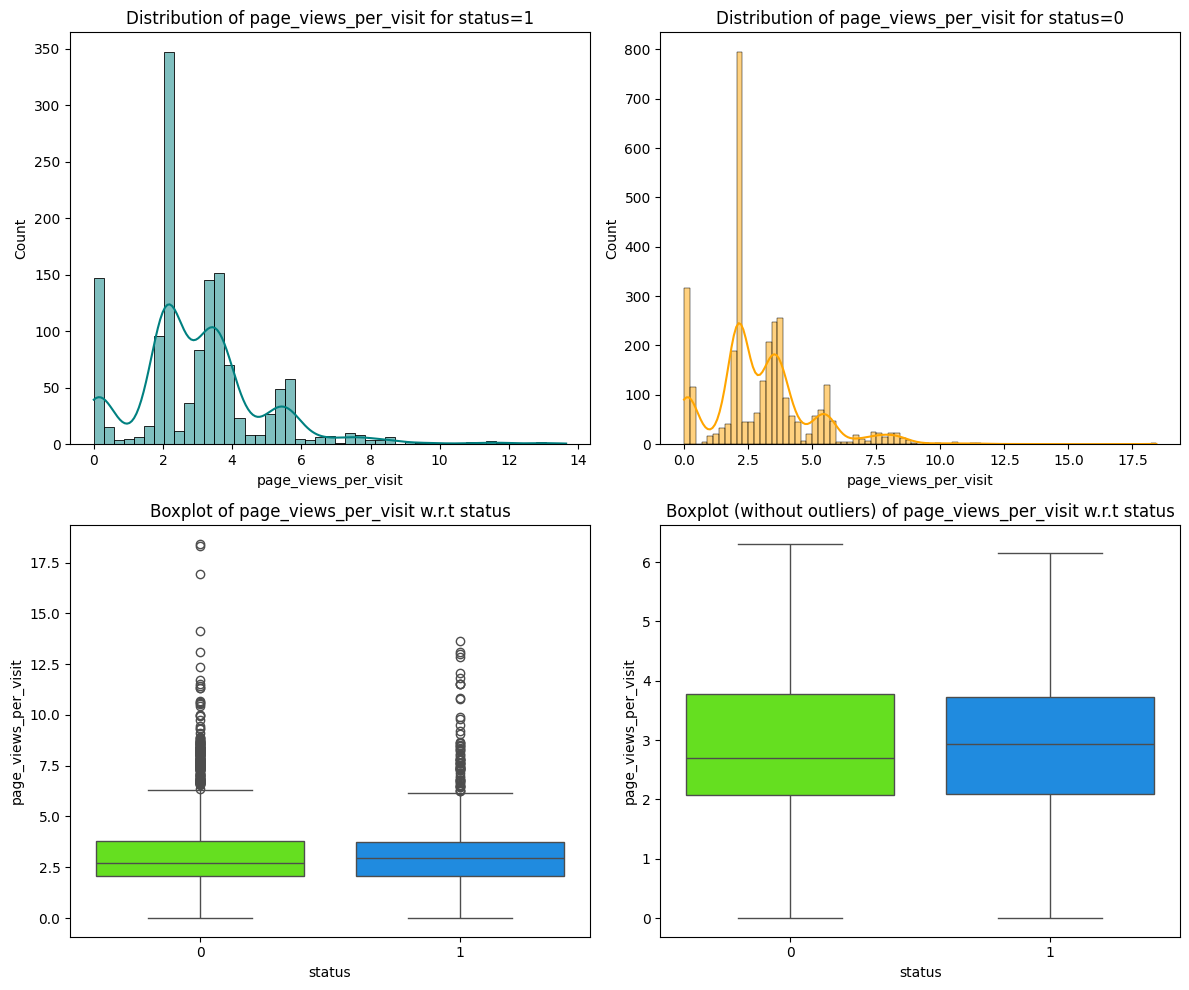

In [22]:
# Display the histogram and boxplot between page_views_per_visit and status
distribution_plot_wrt_target(Learn_df, 'page_views_per_visit', 'status')

**The leads converted to paid customers have a slightly higher mean of page_views_per_visit**. `'This suggests that the page_views_visit might have an impact on converting leads to paid customers`'. 

In [23]:
# Function that displays the category counts and plots a stacked bar chart of two features (named predictor and target) from the data frame

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    
    Parameters:
    - data: dataFrame
    - predictor: independent variable
    - target: target variable
    
    """
    # Calculate category counts
    count = data[predictor].nunique()

    # Create a crosstab with margins
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=1, ascending=False)

    # Print the crosstab
    print(tab)
    print("-" * 135)

    # Plot the stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    
    # Adjust legend position
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
    # Show the plot
    plt.show()


status                   0       1
current_occupation                
Professional       0.64488 0.35512
Unemployed         0.73421 0.26579
Student            0.88288 0.11712
---------------------------------------------------------------------------------------------------------------------------------------


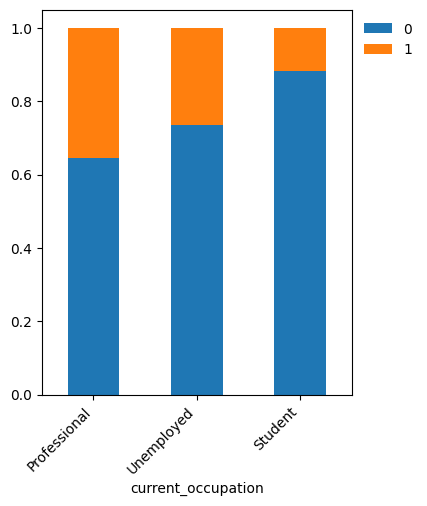

In [24]:
# Display a stacked barplot between current_occupation and status
stacked_barplot(Learn_df, 'current_occupation', 'status')

We observe that **the proportion of leads converted to paid customers decreases as we move from professional, to unemployed, and to student**. `'This suggests that the best customer segment is professionals`'.  

status                  0       1
first_interaction                
Website           0.54406 0.45594
Mobile App        0.89469 0.10531
---------------------------------------------------------------------------------------------------------------------------------------


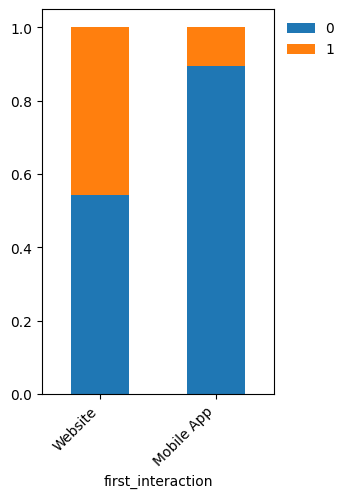

In [25]:
# Display a stacked barplot between first_interaction and status
stacked_barplot(Learn_df, 'first_interaction', 'status')

We observe that **the proportion of leads converted to paid customers is 35% higher when the first interaction happens through the website compared to when it happens on the mobile app**. `'This suggests that leads who have their first interaction on the website are more likely to be converted to paid customers`'.  



status                 0       1
last_activity                   
Website Activity 0.61545 0.38455
Email Activity   0.69666 0.30334
Phone Activity   0.78687 0.21313
---------------------------------------------------------------------------------------------------------------------------------------


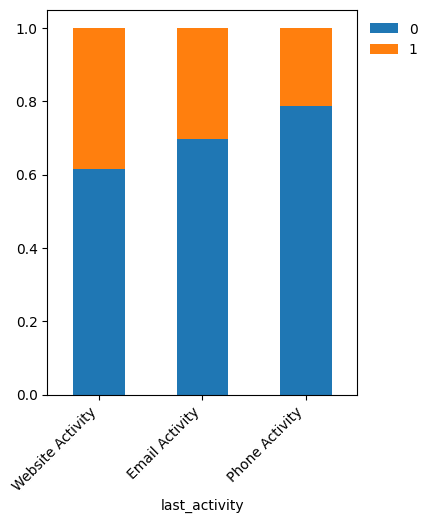

In [26]:
# Display a stacked barplot between last_activity and status
stacked_barplot(Learn_df, 'last_activity', 'status')

**Email Activity and Website Activity (interaction on live chat with a representative, Updated profile on the website, etc) generate the highest proportion of leads converted to paid customers**, with Website activity on the top with 8% more than Email Activity. 

**We observe that in general interactions through websites generate a higher proportion of leads converted to paid customers**. `'However, the first interaction which generates a conversion rate to paid customers of 46% for the website and 11% for the mobile app is important. Because any second interaction is likely to be a follow-up of the first interaction. Converting leads to paid customers starts from the first interaction`'. 


status                  0       1
profile_completed                
High              0.58216 0.41784
Medium            0.81124 0.18876
Low               0.92523 0.07477
---------------------------------------------------------------------------------------------------------------------------------------


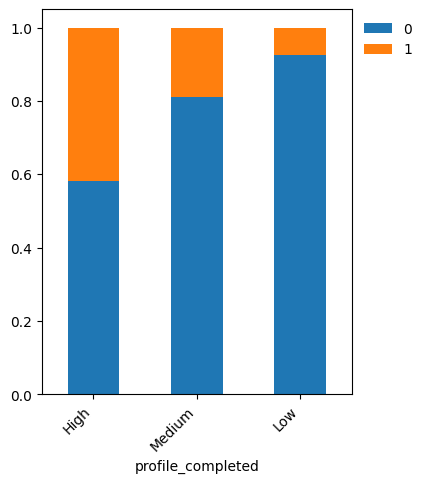

In [27]:
# Display a stacked barplot between profile_completed and status
stacked_barplot(Learn_df, 'profile_completed', 'status')

We observe a positive correlation between the level of completion of the leads profile and the likelihood of converting them to paid customers. **The more information there is about a lead, the more likely it is to convert them to a paid customer**.

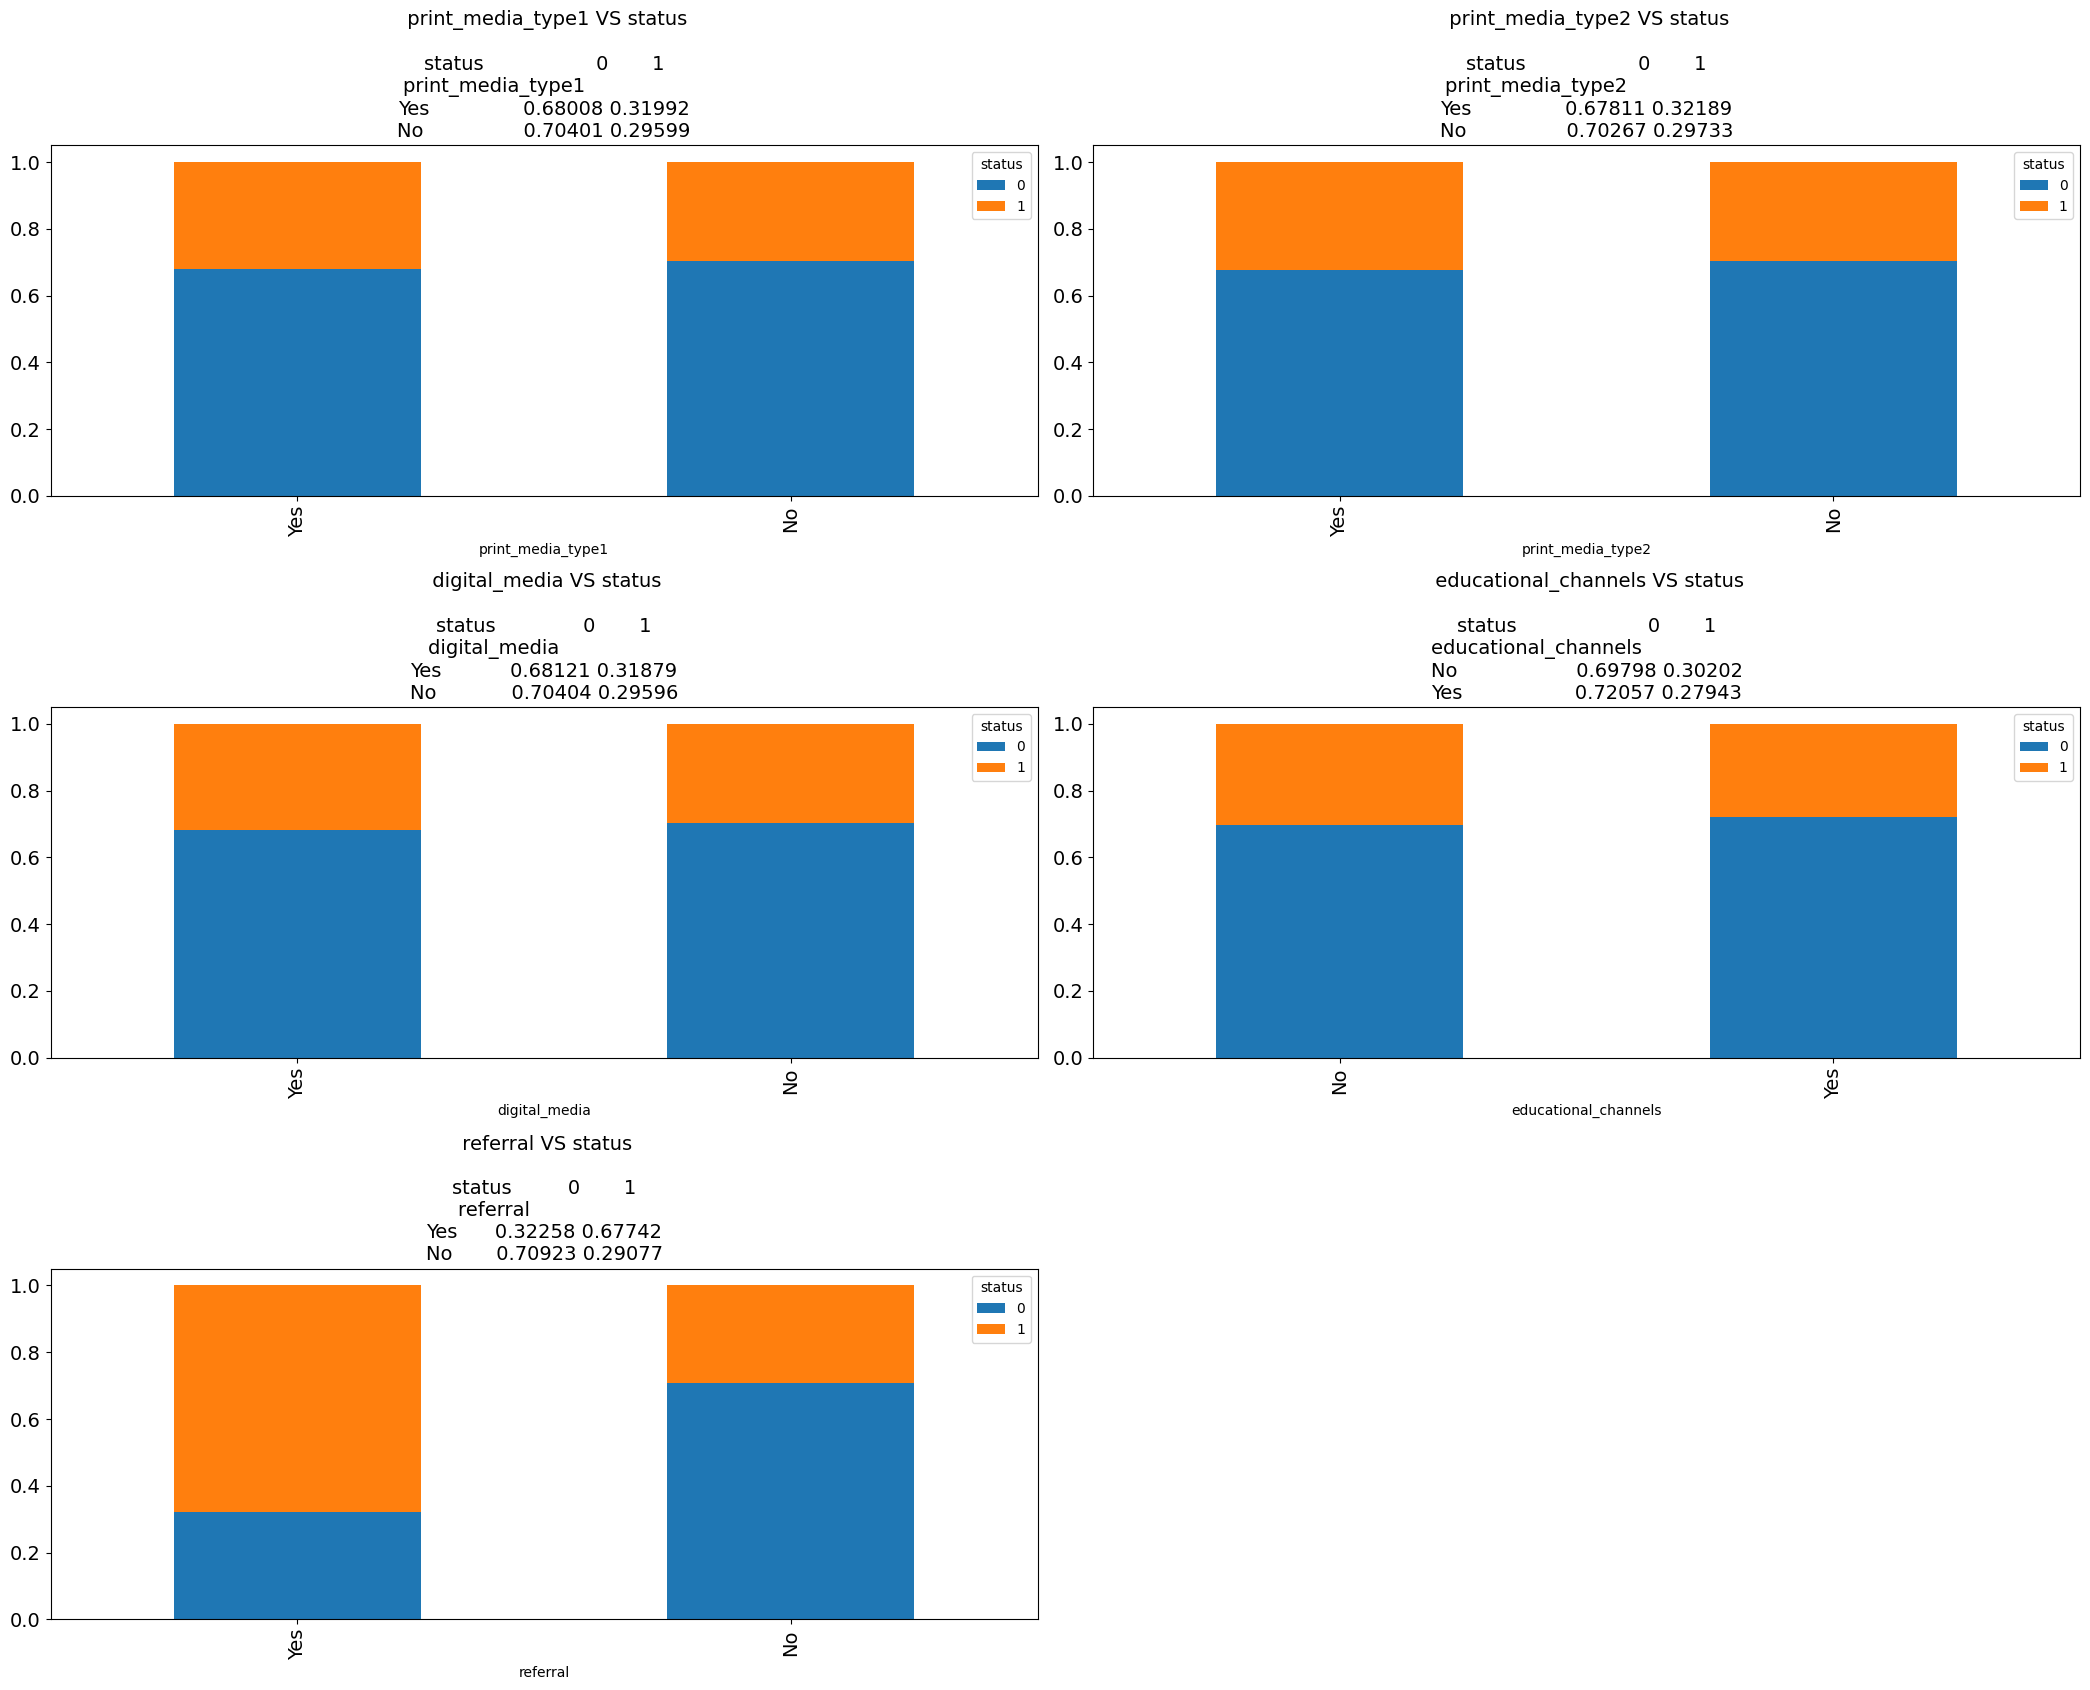

In [28]:
'''
Display stacked histograms and crosstab computations to show the relationship between the various channels 
('print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral') and the leads status 

'''

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots with a specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 17))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over column pairs
for i, col in enumerate(['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']):
    # Perform crosstabulation
    crosstab = pd.crosstab(Learn_df[col], Learn_df['status'], normalize="index").sort_values(by=1, ascending=False)
    
    # Plot histogram
    crosstab.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Add text with crosstab computation to the title
    axes[i].set_title(f' {col} VS status\n\n{crosstab}', fontsize=14)
    
    # Increase the size of the text in the plot
    axes[i].tick_params(axis='both', which='major', labelsize=14)

    # Add space for the next plot
    if i % 2 != 0:
        plt.subplots_adjust(hspace=0.5)

# Hide empty subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


We observe that **the channels 'print_media_type1', 'print_media_type2', 'digital_media', and 'educational_channels' have approximately same proportions of leads converted to paid customers**. Whereas, **referal has the highest proportion that is 68% of leads converted to paid customers**. 


## Below is the summary of the EDA. 

**The comments below were already mentioned above while exploring the dataset**. 

## Overview of the feature in the data.

- The proportion of leads converted to paid customers is 29.9%.
- The age of leads ranges from 18 to 63 years old. Half of the lead population is 51 years old or above. 
- 75% of leads have visited the ExtraaLearn website at most 5 times. 
- On average leads spent 724 units of time on the ExtraaLearn website
- On average leads viewed 3 pages on the ExtraaLearn website, and 75% of them viewed less than 4 pages.
- 55% of leads are professional. The second majority of leads are unemployed, and the minority are students.
- at least 85% of leads have not been flagged to have seen the ad of ExtraaLearn on the different group media.  
-  55% of leads' first interaction with ExtraaLearn is through the website.


## EDA Observation:

**Data Description**:

- There are 4612 observations or rows and 15 columns or features in the dataset.
- There are no missing values in the data. All the columns have 4612 non-null values. 

**Observations from EDA**:

- The feature ID serves as a unique identifier for each lead, but it doesn't contribute meaningfully to our analysis. Thus, we can safely drop this column.
- Among the dataset's features, only four are numerical; the rest are categorical.
- The age distribution is skewed to the left, with leads ranging from 18 to 63 years old. About 50% of leads are aged over 51.
- The distribution of the number of website visits per lead is skewed to the right, with some outliers present. However, these outliers appear to be non-random and do not significantly skew the data.
- Similarly, the distribution of the average number of pages viewed per visit is multimodal and contains outliers. These outliers are not extreme and do not seem to be erroneous data.
- Leads who convert to paid customers tend to have a higher mean age than those who do not, possibly indicating a segment of older professionals.
- The average number of website visits per lead is consistent regardless of conversion status.
- Leads who convert to paid customers spend more time on the website, particularly within the time range of approximately 700 to 2500 units, compared to non-converted leads.
- Paid customers tend to have a slightly higher mean number of page views per visit, suggesting a potential impact on conversion.
- The proportion of leads converted to paid customers varies across different lead segments, with professionals showing the highest conversion rate.
- Leads whose first interaction occurs on the website have a 35% higher conversion rate compared to those whose first interaction is on the mobile app.
- Website interactions generally result in a higher conversion rate, particularly for the first interaction. This underscores the importance of initial interactions in converting leads to paid customers.
- More information about a lead increases the likelihood of conversion to a paid customer.
- While various channels have similar conversion rates, referrals have the highest proportion, with 68% of leads converting to paid customers.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Preparing data for modeling**
* Below create dummy variables for the categorical variables. 
* We split the data into train and test by splitting the data into 70% train and 30% test set.

In [29]:
# Make a copy of the original DataFrame to avoid modifying the original data
Learn_df_copy = Learn_df.copy()

In [30]:
#Drop the columns ID as it will not add value to the modeling
Learn_df.drop(['ID'], axis=1, inplace=True)

In [31]:
# Print a concise summary of a DataFrame to check that the feature ID is dropped.
Learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [32]:
# Define columns for which to create dummy variables
columns_to_get_dummies = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Create dummy variables
Learn_df = pd.get_dummies(data=Learn_df, columns=columns_to_get_dummies, drop_first=True)

# Mapping the features
mapping_dict = {
    'print_media_type1': {'Yes': 1, 'No': 0},
    'print_media_type2': {'Yes': 1, 'No': 0},
    'digital_media': {'Yes': 1, 'No': 0},
    'educational_channels': {'Yes': 1, 'No': 0},
    'referral': {'Yes': 1, 'No': 0}
}

# Apply mappings
for column, mapping in mapping_dict.items():
    Learn_df[column] = Learn_df[column].map(mapping)

In [33]:
Learn_df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.86100,1,0,1,0,0,1,False,True,True,False,False,False,True
1,56,2,83,0.32000,0,0,0,1,0,0,False,False,False,False,True,False,True
2,52,3,330,0.07400,0,0,1,0,0,0,False,False,True,False,True,False,True
3,53,4,464,2.05700,0,0,0,0,0,1,False,True,True,False,False,False,True
4,23,4,600,16.91400,0,0,0,0,0,0,True,False,True,False,False,False,False


In [34]:
# Separating the target variable and other variables

Y = Learn_df['status']  # Extracting the 'status' column as the target variable
X = Learn_df.drop(['status'], axis=1)  # Dropping the 'status' column from X, as it is the target variable

In [35]:
# Splitting the data into 70% train and 30% test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [36]:
###Checking the shape of train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3228, 16)
(1384, 16)
(3228,)
(1384,)


## Modeling 

**Here are some key situations where the model might make mistakes:**

1. **Scenario #1**: Predicting a lead will become a paying customer when it won't.
2. **Scenario #2**: Predicting a lead won't become a paying customer when it actually will.

The company invests resources in reaching out to leads through different channels to provide more information about their product. Misusing these resources on the wrong leads leads to lost revenue. **However, Scenario #2 has a bigger impact because the company not only wastes resources on unlikely leads but also misses out on potential revenue from those leads who are likely to become paying customers. In contrast, Scenario #1 only results in lost revenue from leads who don't convert to paid customers**.

* Therefore, it's crucial to reduce False Negatives to minimize the cost of allocating resources for lead conversion.

**How can we reduce this loss by reducing False Negatives?**
* **To lower False Negatives, the company needs to maximize Recall**—the higher the Recall, that is the higher the proportion of true positives to all the actual positives, the better the chances of minimizing false negatives. So, the focus should be on increasing Recall (minimizing false negatives) or, in other words, identifying true positives (i.e., leads likely to convert) accurately to allocate resources effectively.

**To check the Recall of our models, below is a function that calculates and prints the classification report and confusion matrix for each model**.

In [37]:
#This function prints a classification report, generates a confusion matrix, and then visualizes it as a heatmap.

# Creating metric function
def metrics_score(actual, predicted):
    # Print classification report
    print(classification_report(actual, predicted))

    # Generate confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [38]:
#This function calculates Precision, Recall, and Accuracy to evaluate the performance of a classification model. 

def model_performance_classification(model, predictors, target):
    
    """
    Function to compute different metrics to assess classification model performance.

    Parameters:
    - model: Classifier model.
    - predictors: Independent variables.
    - target: Dependent variable.

    Returns:
    DataFrame: Metrics including Precision, Recall, and Accuracy.
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Compute Recall
    recall = recall_score(target, pred, average='macro')

    # Compute Precision
    precision = precision_score(target, pred, average='macro')

    # Compute Accuracy score
    acc = accuracy_score(target, pred)

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        index=[0],
    )

    return df_perf


## Building a Decision Tree model

**Decision Tree** is a simple yet powerful algorithm used for both classification and regression tasks. It provides a straightforward and interpretable method for decision-making by recursively splitting the feature space based on the most informative features.

A breakdown of how it operates:

1. **Splitting**: The algorithm partitions the feature space into regions based on the feature values that best separate the data.
2. **Decision Making**: At each split, decisions are made based on feature values to classify or predict the target variable.
3. **Tree Structure**: The decisions form a tree-like structure, with nodes representing features, branches representing decisions, and leaf nodes containing the final predictions.
4. **Interpretability**: Decision Trees are easily interpretable, making them valuable for understanding the logic behind predictions.


**We will build our model using the DecisionTreeClassifier function**.

* The target feature in the dataset is **"status"**. The frequency of the subcategories in **"status"** is 70% for `'status=0`' (not converted) and 30% for `'status=1`' ( converted). 
* The subcategory `'status=0`' is dominant. We want our decision tree to adjust the weights of each subcategory accordingly. 

**class_weight is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.30, 1:0.70} to the model to specify the weight of each class and the decision tree will give more weightage to class 1**.

In [39]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 0)

In [40]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=0)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



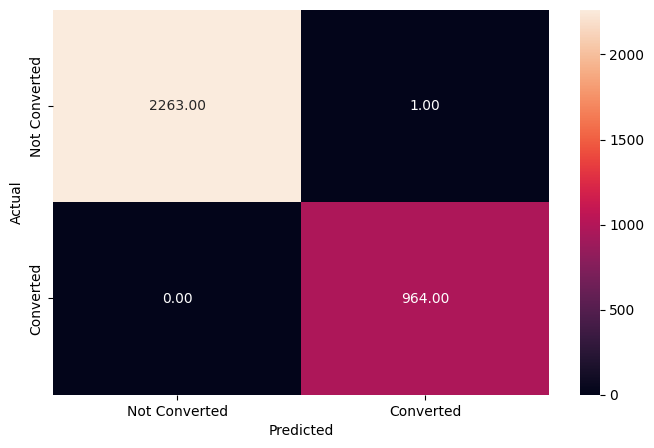

In [41]:
# Predicting labels on the training dataset using the trained decision tree model
y_train_pred_dt = dt.predict(x_train)

# Evaluating the performance of the model on the training dataset
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       971
           1       0.65      0.67      0.66       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



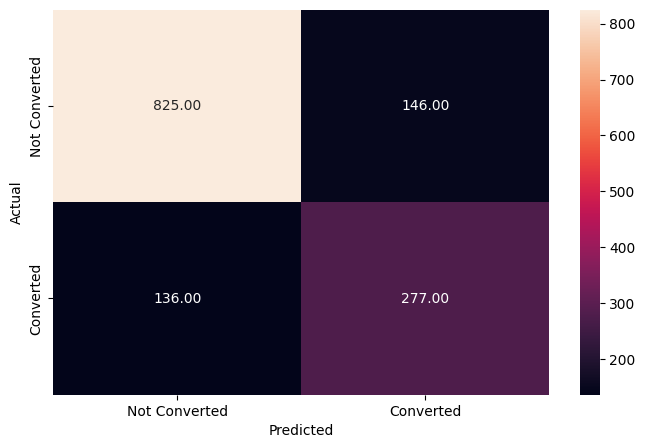

In [42]:
# Predicting labels on the test dataset using the trained decision tree model
y_test_pred_dt = dt.predict(x_test)

# Evaluating the performance of the model on the test dataset
metrics_score(y_test, y_test_pred_dt)

In [43]:
# Assess the performance of the decision tree model on the test dataset
dtree_test = model_performance_classification(dt, x_test, y_test)

# Display the performance metrics for the decision tree model on the test dataset
dtree_test

,Precision,Recall,Accuracy
0,0.75666,0.76017,0.79624


###### **Observations:**

* The Decision Tree performs effectively on the training data but shows a decline in performance on the test data, with a recall of 0.76 compared to 1 on the training dataset. This indicates overfitting of the Decision Tree to the training data.

* Precision on the test data reveals a 24% chance (1 - 0.76) that the model will falsely predict a lead will convert to a paying customer when they won't. Consequently, **the company might allocate resources inefficiently on leads unlikely to convert to paying customers.**

<Axes: xlabel='Importance', ylabel='None'>

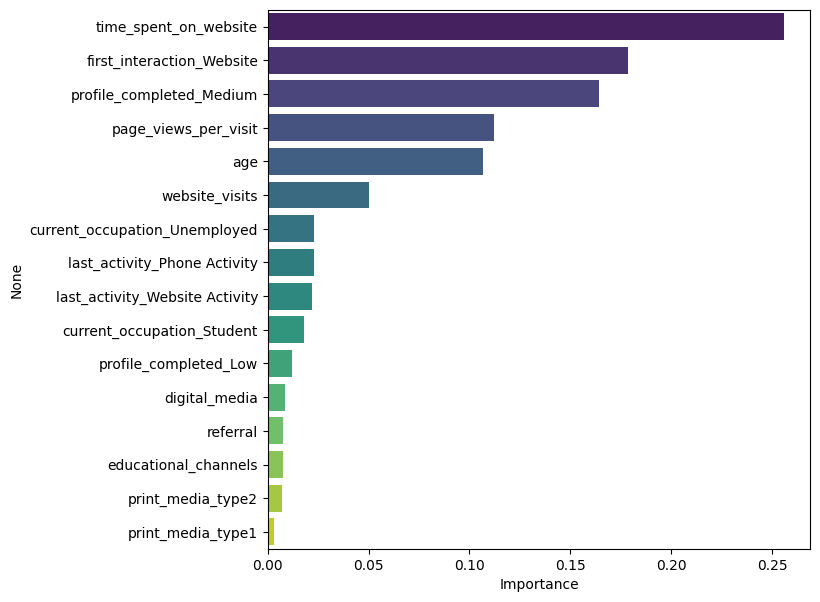

In [44]:
'''
Plot the feature importance
'''

# Get feature importances from the decision tree model
importances = dt.feature_importances_

# Get column names of the features
columns = X.columns

# Create a DataFrame to store feature importances and sort them
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("viridis", len(importance_df))

# Plot bar plot with gradient colors
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=color_palette)

**Observations:**

* The Decision Tree analysis highlights **time_spent_on_website** as the most crucial feature, followed by **first_interaction_website**, **profile_completed_Medium**, **page_views_per_visit**, and **age**.

* This suggests that potential customers who are more inclined to make a purchase tend to spend more time browsing the website. Additionally, the significance of age may indicate that leads of similar age groups, with similar life experiences, are more likely to convert.

**Improving Model Performance with Decision Trees:**
`'Utilizing GridSearch for Hyperparameter Optimization`'

When refining decision trees to enhance model performance, we employ GridSearch, a technique that fine-tunes the parameters of the model through cross-validation over a specified parameter grid. 

**The following parameter will be used with GridSearch to tune the decision tree**. 

**Criterion: {"gini", "entropy"}**
The criterion determines the measure of split quality. We can choose between "gini" for Gini impurity and "entropy" for information gain.

**max_depth**
This parameter sets the maximum depth of the tree. If left as None, nodes are expanded until all leaves are pure or until they contain fewer samples than the specified minimum.

**min_samples_leaf**
This parameter dictates the minimum number of samples required at a leaf node. A split is only considered if it leaves at least the specified number of training samples in each branch, potentially leading to a smoother model, particularly in regression scenarios.

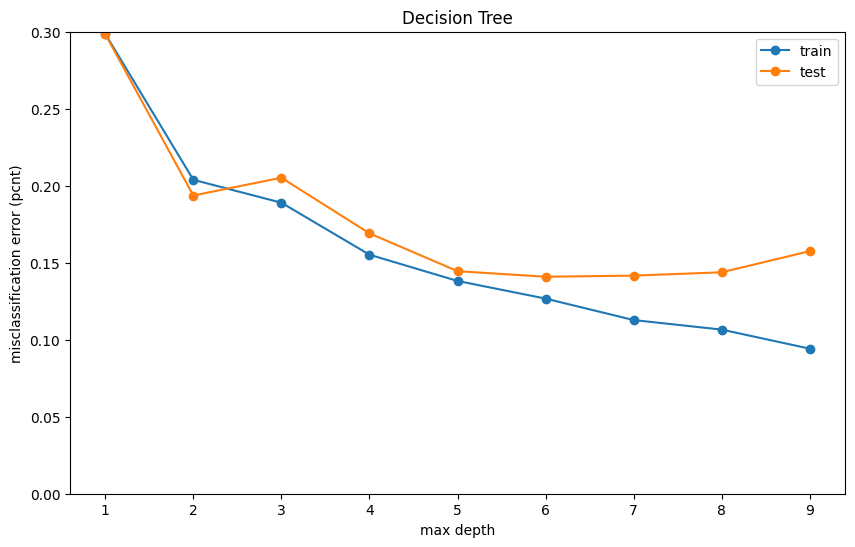

In [45]:
'''
Visualize and compare the error on the train data and the test data for different values of max_depth in the decision tree classifier.

'''

# Initializing empty arrays to store misclassification error rates for training and test datasets
train_scores = np.zeros(9)
test_scores = np.zeros(9)

# Creating a decision tree classifier with entropy criterion
clf = tree.DecisionTreeClassifier(criterion='entropy')

# Looping over different values of max_depth
for depth in range(1, 10):
    # Setting the max_depth parameter
    clf.set_params(max_depth=depth)
    
    # Fitting the classifier to the training data
    clf.fit(x_train, y_train)
    
    # Calculating misclassification error for the training dataset
    train_scores[depth-1] = 1 - clf.score(x_train, y_train)
    
    # Calculating misclassification error for the test dataset
    test_scores[depth-1] = 1 - clf.score(x_test, y_test)

# Plotting the misclassification errors for training and test datasets against max_depth
plt.plot(range(1, 10), train_scores, '-o', label="train")
plt.plot(range(1, 10), test_scores, '-o', label="test")

# Adding legend and labels to the plot
plt.legend(loc='best')
plt.xlabel('max depth')
plt.ylabel('misclassification error (pcnt)')

# Setting the range of the y-axis
plt.ylim(0, 0.3)

# Setting the title of the plot
plt.title(f"Decision Tree")

# Setting the size of the figure
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Displaying the plot
plt.show()


**The optimum max_depth seems to be 5. We will investigate more with the GridSearch method**.

In [46]:
# Choose the type of classifier
dt_estimator_1 = DecisionTreeClassifier(random_state=0)

# Grid of parameters to choose from
parameters_1 = {
    'max_depth': np.arange(2, 9),  # Varying depth from 2 to 8
    'criterion': ['gini', 'entropy'],  # Trying both Gini impurity and entropy
    'min_samples_leaf': [5, 10, 20, 25, 35, 40, 50, 65],  # Testing various values for minimum samples per leaf
    'class_weight': [{0: 0.30, 1: 0.70}]  # Setting class weights
}

# Type of scoring used to compare parameter combinations
scorer_1 = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Run the grid search
gridCV_1 = GridSearchCV(dt_estimator_1, parameters_1, scoring=scorer_1, cv=15)  # 15-fold cross-validation

# Fitting the grid search on the train data
gridCV_1.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dt_estimator_1 = gridCV_1.best_estimator_

# Fit the best estimator to the data
dt_estimator_1.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=0)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      2264
           1       0.60      0.90      0.72       964

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.78      3228
weighted avg       0.84      0.79      0.80      3228



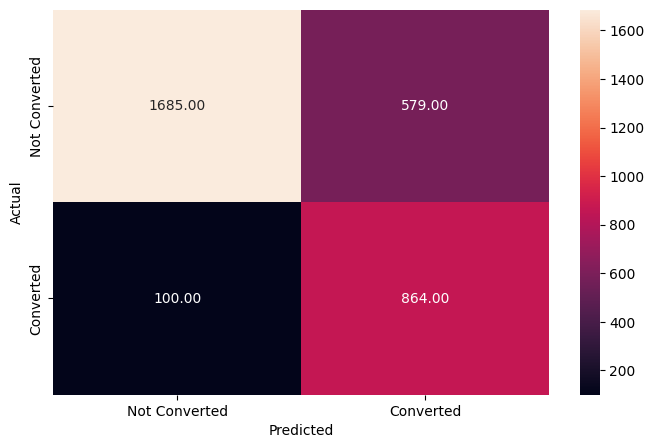

In [47]:
# Predicting labels on the training dataset using the trained decision tree model
y_train_pred_dt_estimator_1 = dt_estimator_1.predict(x_train)

# Evaluating the performance of the model on the training dataset
metrics_score(y_train, y_train_pred_dt_estimator_1)


**Observation:**

- When comparing to the model using default hyperparameter values, **the performance on the training data has noticeably decreased.** This is expected since our aim is to mitigate overfitting.

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.91      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.85      0.79      0.80      1384



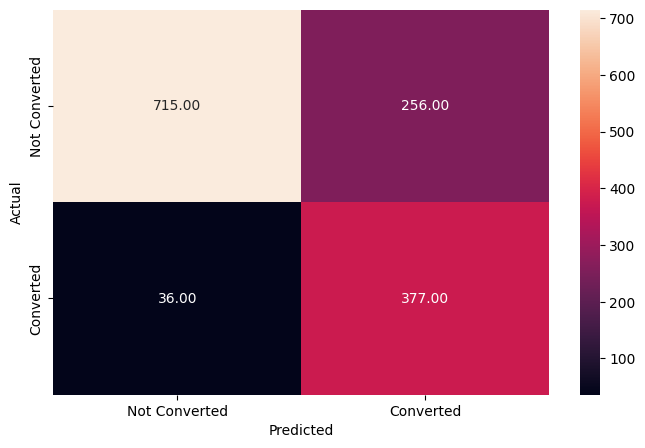

In [48]:
# Predicting labels on the test dataset using the trained decision tree model
y_test_pred_dt_estimator_1 = dt_estimator_1.predict(x_test)

# Evaluating the performance of the model on the test dataset
metrics_score(y_test, y_test_pred_dt_estimator_1)


In [49]:
# Assess the performance of the decision tree model on the test dataset
dtree_estimator_1_test = model_performance_classification(dt_estimator_1, x_test, y_test)

# Display the performance metrics for the decision tree model on the test dataset
dtree_estimator_1_test

,Precision,Recall,Accuracy
0,0.77382,0.82459,0.78902


**Observations:**

* The model that's been fine-tuned performs slightly better than the one using default hyperparameter values.
* There's no overfitting observed, as both the training and test datasets yield similar results.
* The model demonstrates consistent performance across both training and testing datasets. This scenario would be ideal, indicating a well-generalized model, however, the precision of 0.77, recall of 0.82, and accuracy of 0.78 are not good enough.
* Precision on the test data reveals a 23% chance (1 - 0.77) that the model will falsely predict a lead will convert to a paying customer when they won't. **Consequently, the company might allocate resources inefficiently on leads unlikely to convert to paying customers**.
  
**Now, let's examine the feature importance of this model and analyze why these results are occurring.**

<Axes: xlabel='Importance', ylabel='None'>

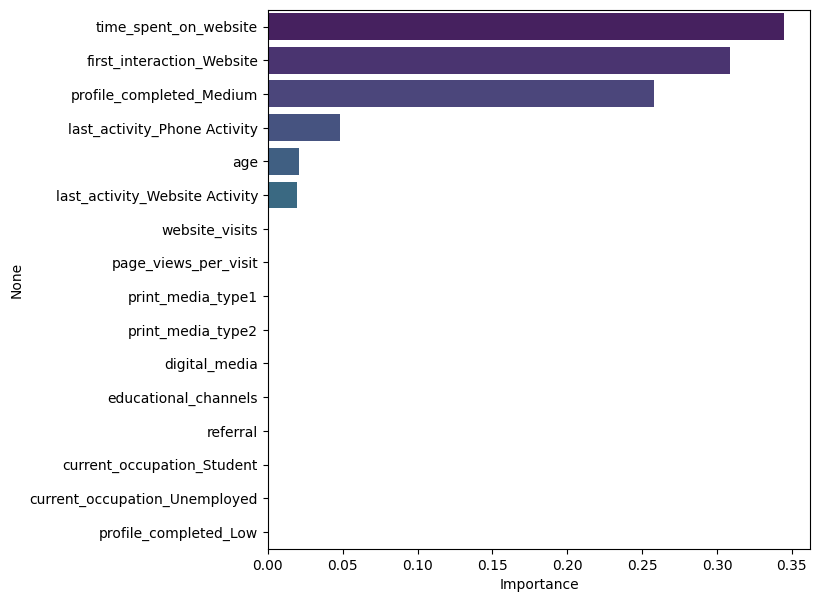

In [50]:
'''
Plot the feature importance
'''

# Get feature importances from the decision tree model
importances = dt_estimator_1.feature_importances_

# Get column names of the features
columns = X.columns

# Create a DataFrame to store feature importances and sort them
importance_dt_estimator_1 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("viridis", len(importance_dt_estimator_1))

# Plot bar plot with gradient colors
sns.barplot(x=importance_dt_estimator_1.Importance, y=importance_dt_estimator_1.index, palette=color_palette)

**Let's check a new model of the decision tree classifier by test lower value paramaters**

In [51]:
# Making another tuned decision tree to check if we can get better results on the test dataset.   
# Choose the type of classifier
dt_estimator_2 = DecisionTreeClassifier(random_state=0)

# Grid of parameters to choose from
parameters_2 = {
    'max_depth': np.arange(2, 9),  # Varying depth from 2 to 8
    'criterion': ['gini', 'entropy'],  # Trying both Gini impurity and entropy
    'min_samples_leaf': [3, 5, 10],  # Testing various values for minimum samples per leaf
    'class_weight': [{0: 0.30, 1: 0.70}]  # Setting class weights
}

# Type of scoring used to compare parameter combinations
scorer_2 = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Run the grid search
gridCV_2 = GridSearchCV(dt_estimator_2, parameters_2, scoring=scorer_2, cv=15)  # 15-fold cross-validation

# Fitting the grid search on the train data
gridCV_2.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dt_estimator_2 = gridCV_2.best_estimator_

# Fit the best estimator to the data
dt_estimator_2.fit(x_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=3, random_state=0)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      2264
           1       0.60      0.90      0.72       964

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.78      3228
weighted avg       0.84      0.79      0.80      3228



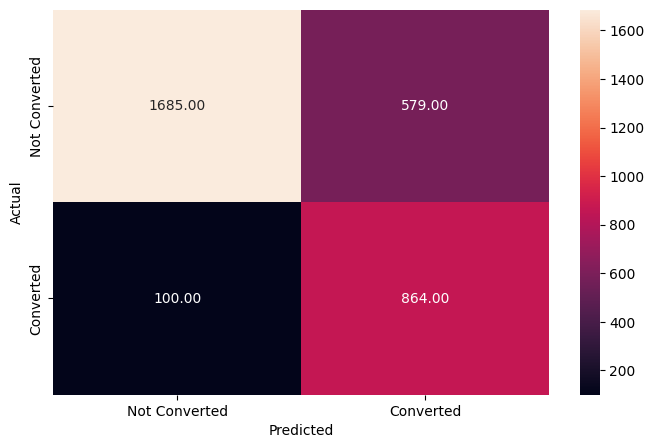

In [52]:
# Predicting labels on the training dataset using the trained decision tree model
y_train_pred_dt_estimator_2 = dt_estimator_2.predict(x_train)

# Evaluating the performance of the model on the training dataset
metrics_score(y_train, y_train_pred_dt_estimator_2)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.91      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.85      0.79      0.80      1384



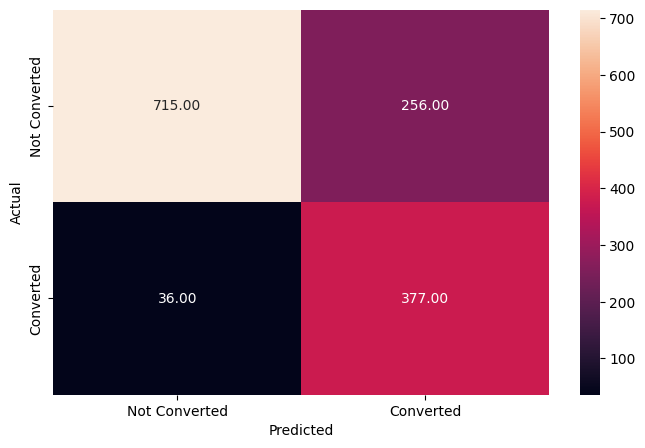

In [53]:
# Predicting labels on the test dataset using the trained decision tree model
y_test_pred_dt_estimator_2 = dt_estimator_2.predict(x_test)

# Evaluating the performance of the model on the test dataset
metrics_score(y_test, y_test_pred_dt_estimator_2)


In [54]:
# Assess the performance of the decision tree model on the test dataset
dtree_estimator_2_test = model_performance_classification(dt_estimator_2, x_test, y_test)

# Display the performance metrics for the decision tree model on the test dataset
dtree_estimator_2_test

,Precision,Recall,Accuracy
0,0.77382,0.82459,0.78902


**Observations:**

* The second model that's been fine-tuned performs similarly than the first model tuned. 
  
**Now, let's examine the feature importance of this model and analyze why these results are occurring.**

<Axes: xlabel='Importance', ylabel='None'>

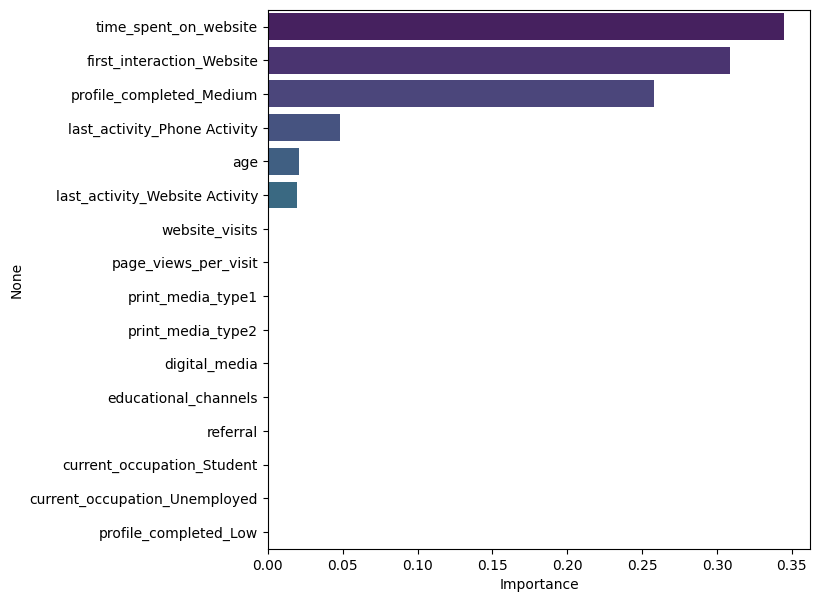

In [55]:
'''
Plot the feature importance
'''

# Get feature importances from the decision tree model
importances = dt_estimator_2.feature_importances_

# Get column names of the features
columns = X.columns

# Create a DataFrame to store feature importances and sort them
importance_dt_estimator_2 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("viridis", len(importance_dt_estimator_2))

# Plot bar plot with gradient colors
sns.barplot(x=importance_dt_estimator_2.Importance, y=importance_dt_estimator_2.index, palette=color_palette)

**Observations:**

* The analysis of both the first and second-tuned Decision Tree models emphasizes that **time_spent_on_website** is the most critical feature, followed by **first_interaction_website**, **profile_completed_Medium**, **last_activity_Phone Activity**, **age**, and **last_activity_Website Activity**.

* This suggests that potential customers who are more inclined to make a purchase tend to spend more time browsing the website, interacting with the company, and completing their profile. They also commonly follow up on their first interaction with the company through phone activity and/or website activity. Additionally, the significance of age may indicate that leads of similar age groups, with similar life experiences, are more likely to convert.

In [56]:
# Comparison of the performance of the decision trees model on the test dataset.

models_test_comp_df = pd.concat(
    [
        dtree_test.T,
        dtree_estimator_1_test.T,
        dtree_estimator_2_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Decision Tree",
    "1st Tuned Decision Tree",
    "2nd Tuned Decision Tree",
]
print("Performance comparison on the decision trees on the test dataset:")
models_test_comp_df.T

Performance comparison on the decision trees on the test dataset:


,Precision,Recall,Accuracy
Original Decision Tree,0.75666,0.76017,0.79624
1st Tuned Decision Tree,0.77382,0.82459,0.78902
2nd Tuned Decision Tree,0.77382,0.82459,0.78902


**We observe that the models we fine-tuned are both similar and show a slight improvement compared to the one with default settings, although its overall accuracy has decreased slightly.**

Now, let's look at the models by examining the counts in their confusion matrices on the test dataset.

**The company's main concern is reducing False Negatives:**

In the test dataset:
* The fine-tuned models had only 36 cases of False Negatives.
* In contrast, the original model had 136 cases.

**Given this, either of the fine-tuned models is preferable for the company's needs.**

+ **Let's check if we can improve the model using the Ramdon Forest Model.**

## Building a Random Forest model

**Random Forest** is a bagging algorithm that uses Decision Trees as its base models. 

Here's how it works:

1. **Sampling**: Random subsets are taken from the training data.
2. **Decision Trees**: A decision tree is built on each subset to make predictions.
3. **Combination**: The results from all the decision trees are combined.
4. **Voting or Averaging**: For classification problems, voting determines the final prediction. For regression problems, averaging is used.

In essence, Random Forest leverages multiple Decision Trees to produce more accurate predictions by aggregating their outputs.

In [57]:
# Creating a Random Forest classifier object with specified class weights and random state
rf = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=0)

# Fitting the Random Forest classifier to the training data
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



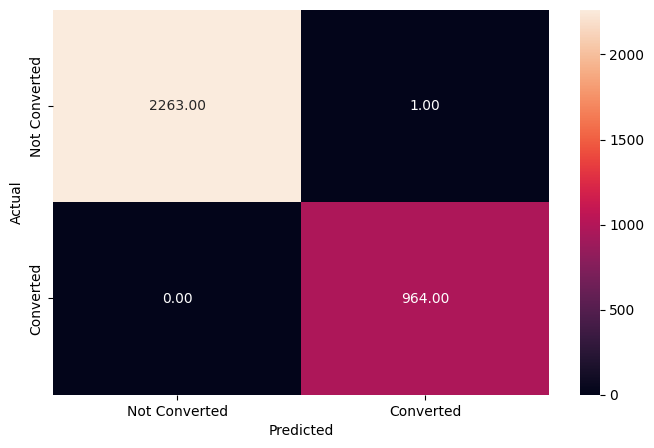

In [58]:
# Predicting labels on the training data using the trained Random Forest classifier
y_pred_train_rf = rf.predict(x_train)

# Evaluating performance metrics on the training data
metrics_score(y_train, y_pred_train_rf)


**Observation:**

* The Random Forest is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.78      0.70      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



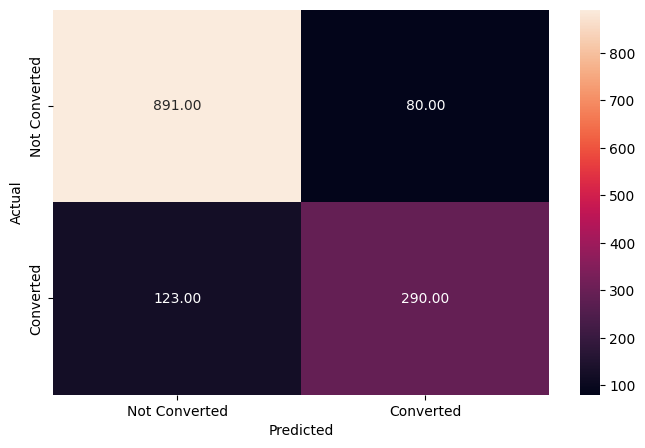

In [59]:
# Predicting labels on the testing data using the trained Random Forest classifier
y_pred_test_rf = rf.predict(x_test)

# Evaluating performance metrics on the testing data
metrics_score(y_test, y_pred_test_rf)


In [60]:
# Assess the performance of the random forest classifier model on the test dataset
rf_test = model_performance_classification(rf,x_test,y_test)

# Display the performance metrics for the random forest classifier model on the test dataset
rf_test

,Precision,Recall,Accuracy
0,0.83124,0.80989,0.85332


**Observations:**

* The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 100%, while the recall on the test data is only  ~ 81% for class 1.

**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance', ylabel='None'>

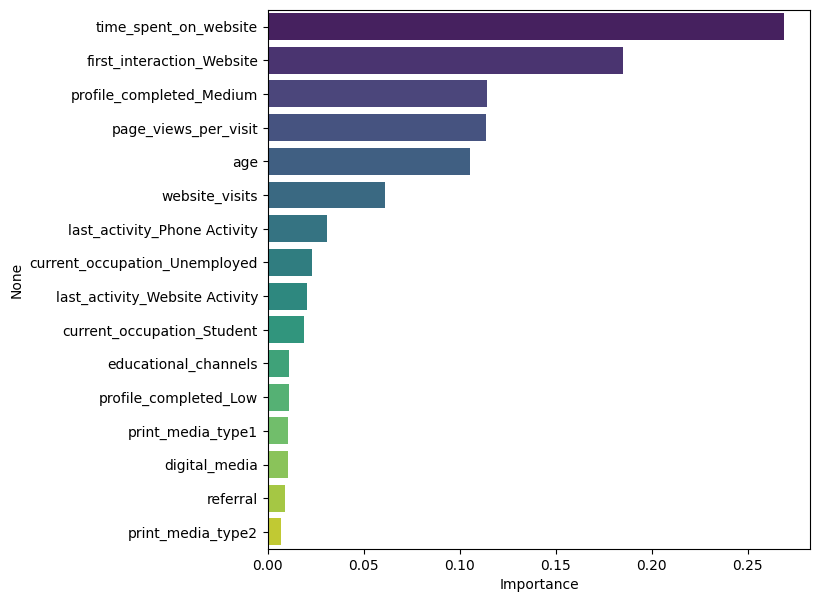

In [61]:
'''
Plot the feature importance
'''

# Get feature importances from the decision tree model
importances = rf.feature_importances_

# Get column names of the features
columns = X.columns

# Create a DataFrame to store feature importances and sort them
importance_rf = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("viridis", len(importance_rf))

# Plot bar plot with gradient colors
sns.barplot(x=importance_rf.Importance, y=importance_rf.index, palette=color_palette)

**Observations:**

* The Random Forest analysis of the important features highlights **time_spent_on_website** as the most crucial feature, followed by **first_interaction_website**, **profile_completed_Medium**, **page_views_per_visit**, **age**, and **website_visits**.

**Possible Justifications:**

* The prominence of **time_spent_on_website** suggests that potential customers who invest more time browsing the website are likely more engaged and interested in the company's offerings. Their extended interaction could indicate a deeper interest in exploring available resources and services.

* **First_interaction_website** ranking high underscores the importance of the initial interaction with ExtraaLearn. A positive first impression, personalized engagement, and relevant content during this interaction can significantly influence a lead's decision-making process and likelihood of becoming a paid customer. Ensuring a seamless and informative experience from the outset can enhance customer conversion rates.

* The presence of **profile_completed_Medium** among significant features indicates that leads who have completed a moderate portion of their profile exhibit a noteworthy impact on conversion. This suggests that customers who invest time in providing detailed information about themselves may be more committed to engaging with the platform's offerings, potentially indicating a higher propensity to convert.

* The relevance of **page_views_per_visit** implies that leads who explore multiple pages during their website visits are more likely to convert. This behavior suggests active exploration and engagement with various aspects of the platform, potentially indicating a stronger interest and intention to subscribe or engage further with ExtraaLearn.

* The inclusion of **age** in the important features underscores the role of demographic factors in influencing conversion. Leads of certain age groups may exhibit distinct preferences, needs, and behaviors, making age a relevant predictor of customer conversion likelihood. Understanding and catering to the preferences and characteristics of different age demographics can enhance targeted marketing efforts and paid customer conversion rates.

* **Website_visits** appearing among significant features suggests that the frequency of website visits contributes to conversion likelihood. Leads who visit the website multiple times may be actively seeking information, comparing options, or progressing through the decision-making process, indicating a higher potential for conversion.

## Model Performance evaluation and improvement

**Improving Model Performance with Random Forest Classifier:** Utilizing GridSearch for Hyperparameter Optimization

To enhance our model's accuracy, we're employing GridSearch, a technique that fine-tunes the model's parameters using cross-validation across a specified parameter grid.

We'll be using the following parameters with GridSearch to optimize the Random Forest Classifier:

- **n_estimators**: Determines the number of trees in the forest.
- **min_samples_split**: Specifies the minimum number of samples required to split an internal node.
- **min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node.
- **max_features{“auto”, “sqrt”, “log2”, 'None'}**: Dictates the number of features to consider when searching for the best split.

  - If “auto”, then max_features=sqrt(n_features).
  - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.

Using GridSearch with these parameters helps us find the optimal configuration for our Random Forest Classifier, ultimately improving its performance.

In [62]:
# Choose the type of classifier
rf_tuned_1 = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=0)

# Grid of parameters to choose from
params_rf_1 = {
    "n_estimators": [100, 250, 500],         # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4, 1),  # Minimum number of samples required to be at a leaf node
    "max_features": [0.7, 0.9, 'auto'],      # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_1 = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj_1 = GridSearchCV(rf_tuned_1, params_rf_1, scoring=scorer_1, cv=5)  # 5-fold cross-validation

grid_obj_1 = grid_obj_1.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned_1 = grid_obj_1.best_estimator_

# Fit the tuned random forest estimator to the data
rf_tuned_1.fit(x_train, y_train)


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.7,
                       min_samples_leaf=3, n_estimators=500, random_state=0)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2264
           1       0.89      0.96      0.92       964

    accuracy                           0.95      3228
   macro avg       0.93      0.95      0.94      3228
weighted avg       0.95      0.95      0.95      3228



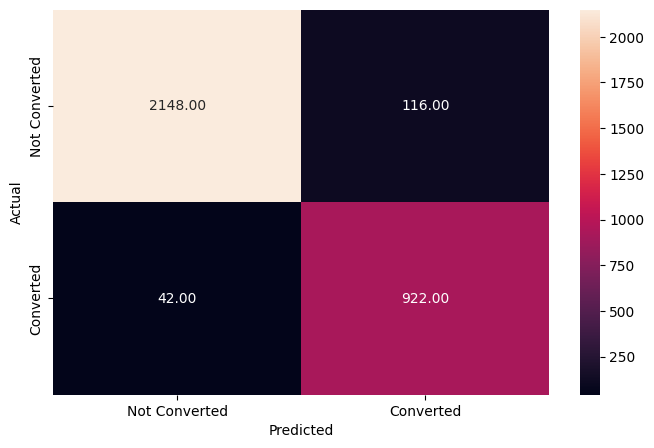

In [63]:
# Assess the performance of the random forest classifier model on the training dataset
y_train_pred_rf_tuned_1 = rf_tuned_1.predict(x_train)

# Display the performance metrics for the random forest classifier model on the training dataset
metrics_score(y_train, y_train_pred_rf_tuned_1)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       971
           1       0.74      0.78      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.85      1384



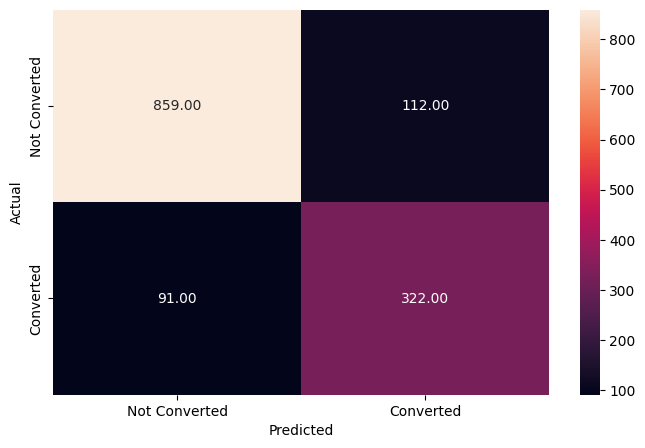

In [64]:
# Assess the performance of the random forest classifier model on the test dataset
y_test_pred_rf_tuned_1 = rf_tuned_1.predict(x_test)

# Display the performance metrics for the random forest classifier model on the test dataset
metrics_score(y_test, y_test_pred_rf_tuned_1)

In [65]:
rf_tuned_1_test = model_performance_classification(rf_tuned_1,x_test,y_test)
rf_tuned_1_test

,Precision,Recall,Accuracy
0,0.82307,0.83216,0.85332


**Observations:**

* The tuned model exhibits higher performance on the training dataset compared to the test dataset. While this difference suggests slight overfitting to the training data, it demonstrates good performance on the test dataset.
* The recall for class 1 has increased from 0.80 in the original model to 0.83, albeit with a slight decrease in precision.
* This model achieves the highest recall percentage among all models tested so far, with solid precision and recall scores on the test dataset.
* However, the count of False Negatives in the confusion matrices is higher for this model, with 91 cases, compared to the tuned decision tree model, which has 36 cases. Consequently, it may not be advantageous for the company to use this tuned random forest model (rf_tuned_1).

**Next step: Let's examine the feature importance of the Random Forest.**

<Axes: xlabel='Importance', ylabel='None'>

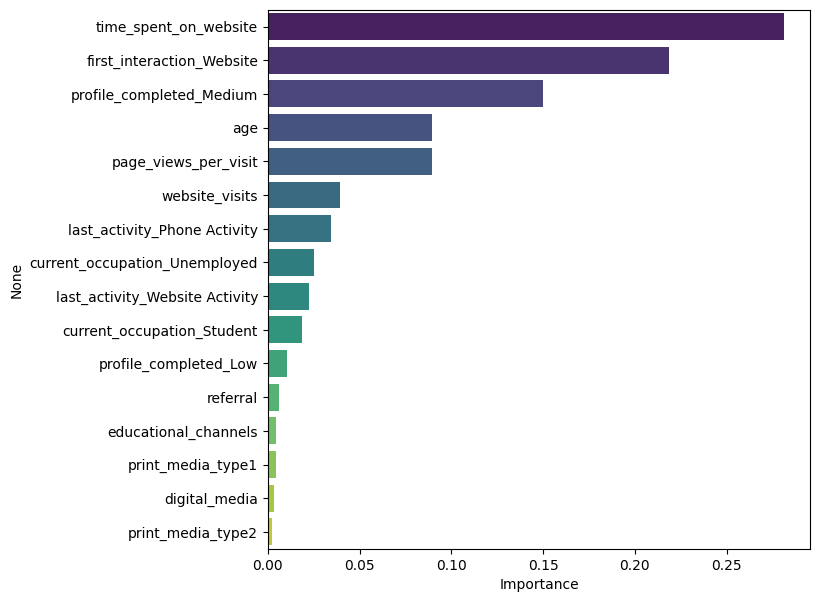

In [66]:
'''
Plot the feature importance
'''

# Get feature importances from the decision tree model
importances = rf_tuned_1.feature_importances_

# Get column names of the features
columns = X.columns

# Create a DataFrame to store feature importances and sort them
importance_rf_tuned_1 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("viridis", len(importance_rf_tuned_1))

# Plot bar plot with gradient colors
sns.barplot(x=importance_rf_tuned_1.Importance, y=importance_rf_tuned_1.index, palette=color_palette)

**Observations:**

* The analysis of the important features of the tuned random forest model has similar highlights to the original random forest model,  **time_spent_on_website** as the most crucial feature, followed by **first_interaction_website**, **profile_completed_Medium**, **page_views_per_visit**, **age**, and **website_visits**.


**Let's check another model of a random forest classifier with different parameters**. Using GridSearch for Hyperparameter Optimization.

In [67]:
# Choose the type of classifier
rf_tuned_2 = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=0)

# Grid of parameters to choose from
params_rf_2 = {
    "n_estimators": [250, 350, 500, 650],         # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4, 1),  # Minimum number of samples required to be at a leaf node
    "max_features": [0.5, 0.7, 0.9, 'auto'],      # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_2 = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj_2 = GridSearchCV(rf_tuned_2, params_rf_2, scoring=scorer_2, cv=5)  # 5-fold cross-validation

grid_obj_2 = grid_obj_2.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned_2 = grid_obj_2.best_estimator_

# Fit the tuned random forest estimator to the data
rf_tuned_2.fit(x_train, y_train)


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.5,
                       min_samples_leaf=3, n_estimators=350, random_state=0)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2264
           1       0.88      0.95      0.91       964

    accuracy                           0.95      3228
   macro avg       0.93      0.95      0.94      3228
weighted avg       0.95      0.95      0.95      3228



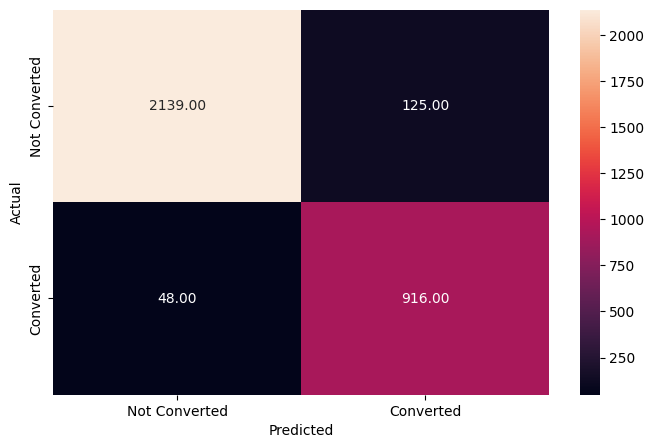

In [68]:
# Assess the performance of the random forest classifier model on the training dataset
y_train_pred_rf_tuned_2 = rf_tuned_2.predict(x_train)

# Display the performance metrics for the random forest classifier model on the training dataset
metrics_score(y_train, y_train_pred_rf_tuned_2)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       971
           1       0.75      0.78      0.77       413

    accuracy                           0.86      1384
   macro avg       0.83      0.84      0.83      1384
weighted avg       0.86      0.86      0.86      1384



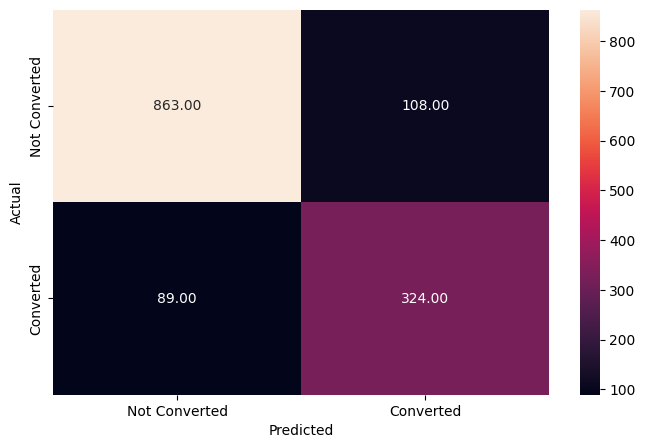

In [69]:
# Assess the performance of the random forest classifier model on the test dataset
y_test_pred_rf_tuned_2 = rf_tuned_2.predict(x_test)

# Display the performance metrics for the random forest classifier on the test dataset
metrics_score(y_test, y_test_pred_rf_tuned_2)

In [70]:
rf_tuned_2_test = model_performance_classification(rf_tuned_2,x_test,y_test)
rf_tuned_2_test

,Precision,Recall,Accuracy
0,0.82826,0.83664,0.85766


**Observations:** 

(**Two Random Forest models were tuned and they shows very much similar performance on the test dataset.**)

* The second random forest model tuned shows higher performance on the training dataset compared to the test dataset. While this difference suggests slight overfitting to the training data, it demonstrates good performance on the test dataset.
* The recall for class 1 has increased from 80% in the original model to ~ 84%, albeit with a slight decrease in precision.
* This model achieves the highest recall percentage among all models tested so far, with solid precision and recall scores on the test dataset.
* However, the count of False Negatives in the confusion matrices is higher for this model, with 89 cases, compared to the tuned decision tree model, which has 36 cases. Consequently, it may not be advantageous for the company to use this tuned random forest model (rf_tuned_2).

**Next step: Let's examine the feature importance of the Random Forest.**

<Axes: xlabel='Importance', ylabel='None'>

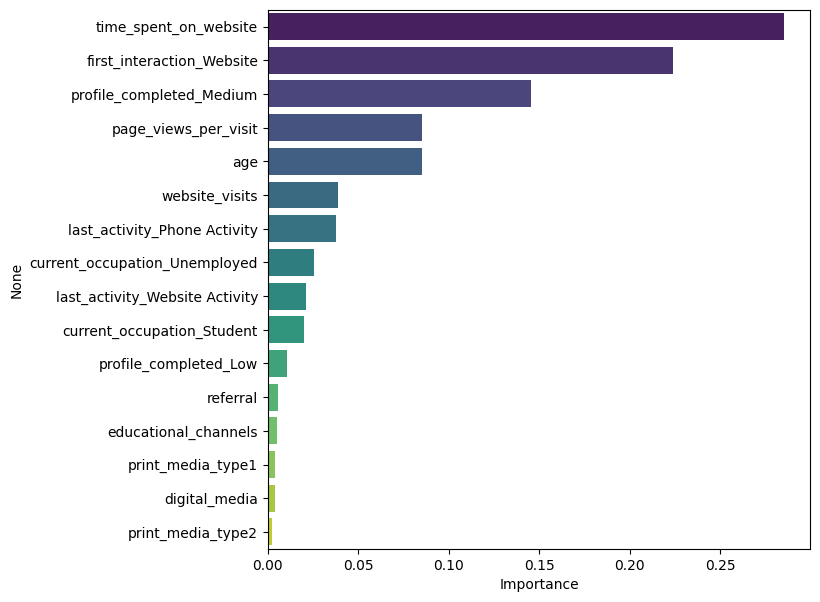

In [71]:
'''
Plot the feature importance
'''

# Get feature importances from the decision tree model
importances = rf_tuned_2.feature_importances_

# Get column names of the features
columns = X.columns

# Create a DataFrame to store feature importances and sort them
importance_rf_tuned_2 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Set up the figure size
plt.figure(figsize=(7, 7))

# Define custom colors for the bar plot with gradient
color_palette = sns.color_palette("viridis", len(importance_rf_tuned_2))

# Plot bar plot with gradient colors
sns.barplot(x=importance_rf_tuned_2.Importance, y=importance_rf_tuned_2.index, palette=color_palette)

**Observations for the tuned random forest models are similar:**

* The analysis of the important features of the tuned random forest models have similar highlights to the original random forest model,  **time_spent_on_website** as the most crucial feature, followed by **first_interaction_website**, **profile_completed_Medium**, **page_views_per_visit**, **age**, and **website_visits**.


In [72]:
# Comparison of the performance of the decision trees model on the test dataset.

models_test_comp_df = pd.concat(
    [
        dtree_test.T,
        dtree_estimator_1_test.T,
        dtree_estimator_2_test.T,
        rf_test.T,
        rf_tuned_1_test.T,
        rf_tuned_2_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Original Decision Tree",
    "1st Tuned Decision Tree",
    "2nd Tuned Decision Tree",
    "Original Random Forest",
    "1st Tuned Random Forest",
    "2nd Tuned Random Forest",
]
print("Performance comparison of the decision trees and the random forest on the test dataset:")
models_test_comp_df.T

Performance comparison of the decision trees and the random forest on the test dataset:


,Precision,Recall,Accuracy
Original Decision Tree,0.75666,0.76017,0.79624
1st Tuned Decision Tree,0.77382,0.82459,0.78902
2nd Tuned Decision Tree,0.77382,0.82459,0.78902
Original Random Forest,0.83124,0.80989,0.85332
1st Tuned Random Forest,0.82307,0.83216,0.85332
2nd Tuned Random Forest,0.82826,0.83664,0.85766


* We observe that the 2nd Tuned Random Forest achieves the highest recall and accuracy scores.**Recall measures how well the model captures all actual positive cases.** 

* **The company aims to retain as many potential paying customers as possible, which means minimizing false negatives in predictions.** Despite the 2nd Tuned Random Forest having the highest recall and accuracy scores, **it actually has more false negatives compared to both the 1st and 2nd Tuned Decision Trees, which perform similarly.**

**Let's display the confusion matrices of all the models together to compare the number of false negatives.**

Confusion Matrix for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       971
           1       0.65      0.67      0.66       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



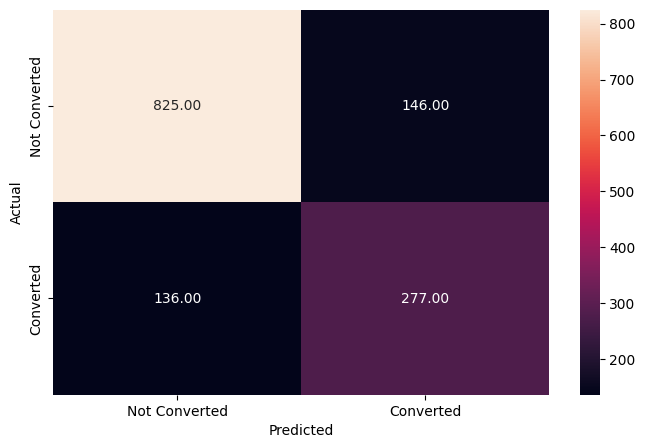

----------------------------------------------------------------------------------------------------
Confusion Matrix for 1st Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.91      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.85      0.79      0.80      1384



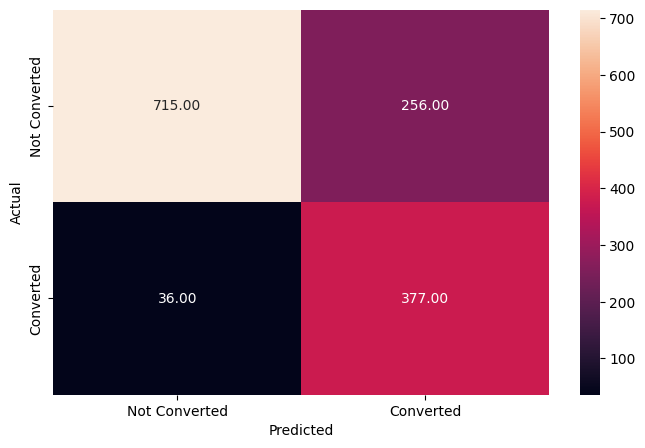

----------------------------------------------------------------------------------------------------
Confusion Matrix for 2nd Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       971
           1       0.60      0.91      0.72       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.85      0.79      0.80      1384



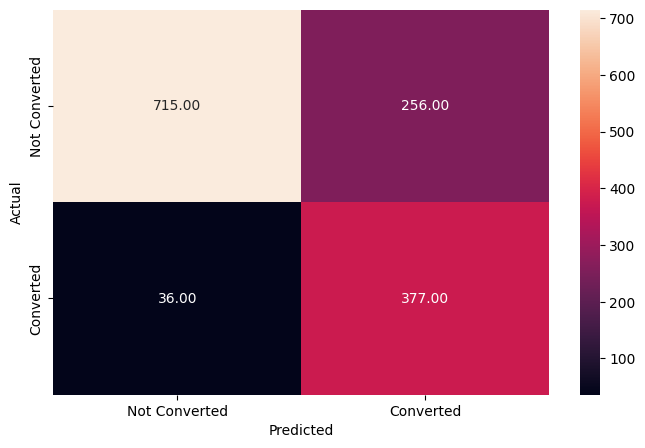

----------------------------------------------------------------------------------------------------
Confusion Matrix for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.78      0.70      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



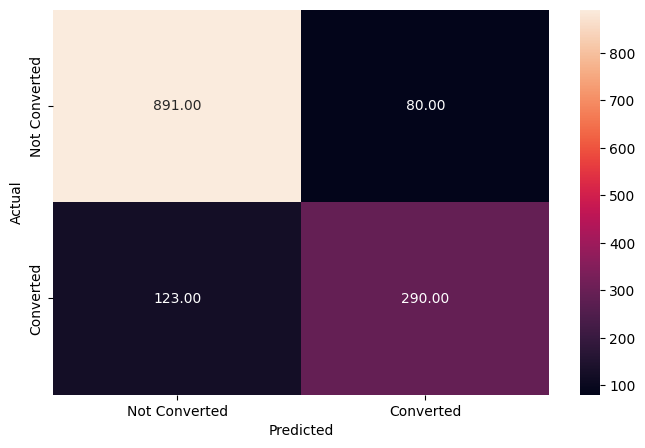

----------------------------------------------------------------------------------------------------
Confusion Matrix for 1st Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       971
           1       0.74      0.78      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.85      1384



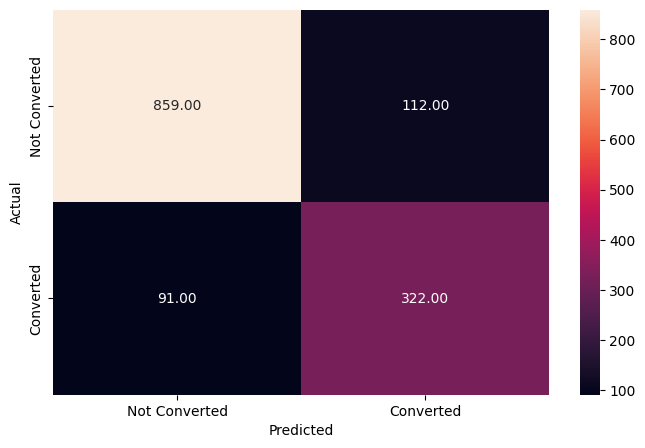

----------------------------------------------------------------------------------------------------
Confusion Matrix for 2nd Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       971
           1       0.75      0.78      0.77       413

    accuracy                           0.86      1384
   macro avg       0.83      0.84      0.83      1384
weighted avg       0.86      0.86      0.86      1384



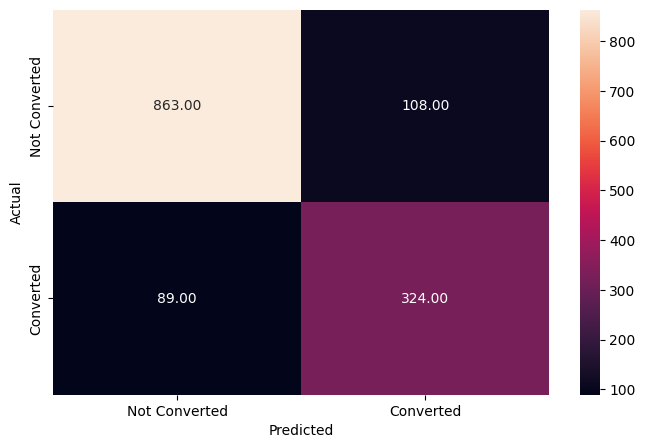

In [73]:
'''
Print all the confusion matrices together for an easy look-up of false negative count.
'''

# Print title for Decision Tree confusion matrix
print("Confusion Matrix for Decision Tree:")
# Get count of False Negatives for Decision Tree
false_negatives_dt = metrics_score(y_test, dt.predict(x_test))

# Print separator line
print('-' * 100)

# Print title for 1st Tuned Decision Tree confusion matrix
print("Confusion Matrix for 1st Tuned Decision Tree:")
# Get count of False Negatives for 1st Tuned Decision Tree
false_negatives_dt_estimator_1 = metrics_score(y_test, dt_estimator_1.predict(x_test))

# Print separator line
print('-' * 100)

# Print title for 2nd Tuned Decision Tree confusion matrix
print("Confusion Matrix for 2nd Tuned Decision Tree:")
# Get count of False Negatives for 2nd Tuned Decision Tree
false_negatives_dt_estimator_2 = metrics_score(y_test, dt_estimator_2.predict(x_test))

# Print separator line
print('-' * 100)

# Print title for Random Forest confusion matrix
print("Confusion Matrix for Random Forest:")
# Get count of False Negatives for Random Forest
false_negatives_rf = metrics_score(y_test, rf.predict(x_test))

# Print separator line
print('-' * 100)

# Print title for 1st Tuned Random Forest confusion matrix
print("Confusion Matrix for 1st Tuned Random Forest:")
# Get count of False Negatives for 1st Tuned Random Forest
false_negatives_rf_tuned_1 = metrics_score(y_test, rf_tuned_1.predict(x_test))

# Print separator line
print('-' * 100)

# Print title for 2nd Tuned Random Forest confusion matrix
print("Confusion Matrix for 2nd Tuned Random Forest:")
# Get count of False Negatives for 2nd Tuned Random Forest
false_negatives_rf_tuned_2 = metrics_score(y_test, rf_tuned_2.predict(x_test))


**Observation:**
* The 1st and 2nd tuned decision tree models have similar performances on the test dataset, with the lowest counts of false negatives. **Either of these models will help the company convert more leads into paid customers.**



**Let's check if we can obtain a better model with XGBoosting Classifier.**

## Building a XGBoost Classifier model

**XGBoost (Extreme Gradient Boosting)** is an ensemble learning technique that is particularly powerful for structured/tabular data. It is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms.

Here's how it works:

* **Gradient Boosting:** XGBoost builds a series of decision trees sequentially, each one aiming to correct the errors made by the previous tree.
* **Objective Function:** It optimizes a predefined objective function, typically focusing on reducing the loss or error of the model.
* **Regularization:** XGBoost includes regularization techniques to prevent overfitting, such as shrinkage (learning rate) and tree pruning.
* **Feature Importance:** It provides a measure of feature importance, highlighting which features contribute the most to the model's predictive performance.

**In summary, XGBoost combines the predictions from multiple weak learners (decision trees) to create a strong learner, achieving state-of-the-art performance in many machine learning tasks. It's widely used in various applications due to its efficiency, scalability, and high predictive accuracy.**

In [74]:
# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# Creating a XGBoost Classifier object with specified objective function (eval_metric) and random state
xgb = XGBClassifier(random_state = 0, eval_metric = 'logloss')

# Fitting the XGBoost Classifier classifier to the training data
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       0.99      0.99      0.99       964

    accuracy                           1.00      3228
   macro avg       0.99      1.00      0.99      3228
weighted avg       1.00      1.00      1.00      3228



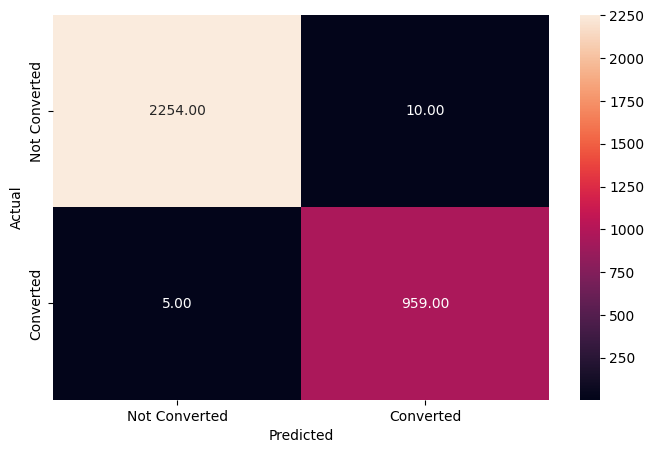

In [75]:
# Assess the performance of the XGBoost Classifier model on the training dataset
y_train_pred_xgb = xgb.predict(x_train)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y_train, y_train_pred_xgb)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       971
           1       0.75      0.73      0.74       413

    accuracy                           0.84      1384
   macro avg       0.82      0.81      0.81      1384
weighted avg       0.84      0.84      0.84      1384



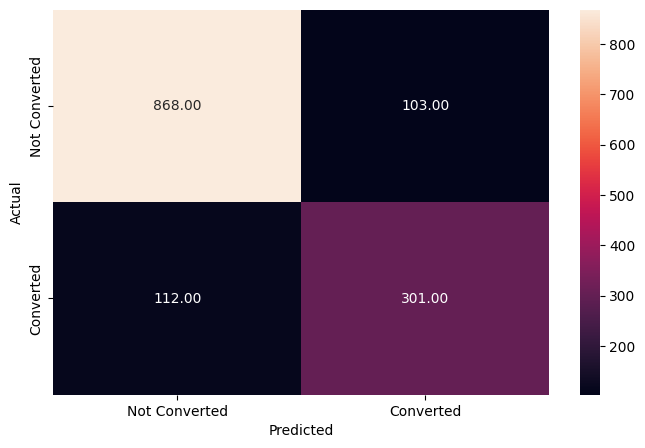

In [76]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y_test_pred_xgb = xgb.predict(x_test)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y_test, y_test_pred_xgb)

**Observations:**

* The XGBoosting classifier **seems to be overfitting the training data**. The recall on the training data is almost 100%, while the recall on the test data is only  ~ 81% for class 1.

In [77]:
# Model Performance on the test data
xgb_test = model_performance_classification(xgb,x_test,y_test)

xgb_test

,Precision,Recall,Accuracy
0,0.81538,0.81137,0.84465


**XGBoosting model performance is not so not better than the random forest models.** 

## Model Performance evaluation and improvement

**Improving Model Performance with XGBOosting Classifier:** Utilizing GridSearch for Hyperparameter Optimization

We'll be using the following parameters with GridSearch to optimize the XGBoosting Classifier:

1. `'n_estimators'`: Number of trees in the XGBoost model. Higher values can increase model complexity and potentially overfitting but may improve performance up to a point.

2. `'max_depth'`: Maximum depth of each decision tree. Controls the complexity of individual trees. Deeper trees can capture more complex patterns but may lead to overfitting.

3. `'learning_rate'`: Step size at each iteration while moving towards minimizing the loss function. Lower values require more boosting rounds but can improve generalization.

4. `'scale_pos_weight'`: Helps handle class imbalance in binary classification tasks by adjusting the balance of positive and negative class weights. Higher values give more weight to the minority class, potentially improving its classification.

Using GridSearch with these parameters helps us find the optimal configuration for our Random Forest Classifier, ultimately improving its performance.

In [78]:
# Define the XGBoost classifier
xgb_tuned = XGBClassifier()

# Define parameter grid to search through
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': [0.7, 0.8, 0.9]  # Adjusting for class imbalance
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer_xgb = metrics.make_scorer(recall_score, pos_label=1)  # Using recall as the scoring metric

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid_xgb, scoring=scorer_xgb, cv=5, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Set the classifier to the best combination of parameters
xgb_tuned = grid_search.best_estimator_

# Fit the tuned XGBoosting classifier estimator to the data
xgb_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2264
           1       0.80      0.75      0.77       964

    accuracy                           0.87      3228
   macro avg       0.85      0.83      0.84      3228
weighted avg       0.87      0.87      0.87      3228



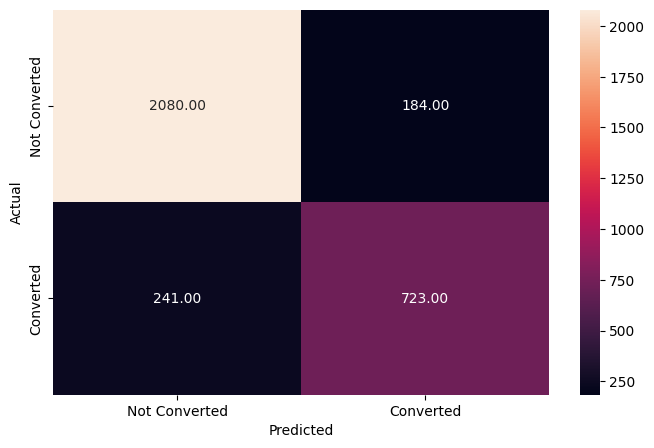

In [79]:
# Assess the performance of the XGBoost Classifier model on the training dataset
y_train_pred_xgb_tuned = xgb_tuned.predict(x_train)

# Display the performance metrics for XGBoost Classifier model on the training dataset
metrics_score(y_train, y_train_pred_xgb_tuned)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.79      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



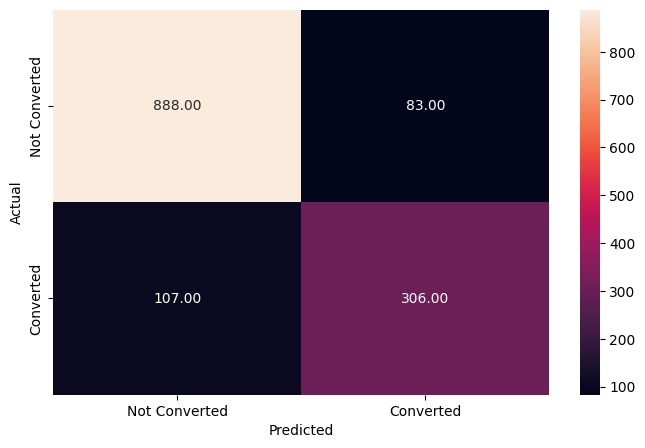

In [80]:
# Assess the performance of the XGBoost Classifier model on the test dataset
y_test_pred_xgb_tuned = xgb_tuned.predict(x_test)

# Display the performance metrics for XGBoost Classifier model on the test dataset
metrics_score(y_test, y_test_pred_xgb_tuned)

In [81]:
# Model Performance on the test data
xgb_tuned_test = model_performance_classification(xgb_tuned,x_test,y_test)

xgb_tuned_test

,Precision,Recall,Accuracy
0,0.83955,0.82772,0.86272


**Observation:**

The tuned XGBoost model shows a slight improvement over the initial XGBoost model. **Yet, neither model seems beneficial for the company's goal of converting more customers because they both have a higher count of false negatives in their confusion matrices compared to any previously developed models.**

## Actionable Insights and Recommendations

We analyzed a dataset containing various attributes of customers, also known as leads. ExtraaLearn, an Edtech startup, obtained this lead information and is interested in identifying attributes common to leads that are more likely to convert to paid customers. **The goal is to allocate resources efficiently and maximize revenue**. To achieve this, **ExtraaLearn needs to convert all leads with a high likelihood of becoming paid customers**. We developed and tested several predictive models to identify such leads.

**Our objective was to select a predictive model that not only identifies common features among leads likely to convert but also minimizes false negatives, ensuring minimal misclassification of leads that will actually convert**. After a thorough evaluation, we found that a tuned Decision Tree model was the most effective.

The predictive model Decision Tree indicates the feature **time_spent_on_website** as the most crucial feature, followed by **first_interaction_website**, **profile_completed_Medium**, **Last Activity (Phone Activity)**, **age**, and **Last Activity (Website Activity)**. Indeed, the amount of time a lead spends on ExtraaLearn's website significantly influences their likelihood of conversion.

Based on our analysis, we have drawn conclusions regarding the importance of each significant feature found:


The predictive model Decision Tree indicates the feature **time_spent_on_website** as the most crucial feature, followed by **first_interaction_website**, **profile_completed_Medium**, **Last Activity (Phone Activity)**, **age**, and **Last Activity (Website Activity)**. Indeed, the amount of time a lead spends on ExtraaLearn's website significantly influences their likelihood of conversion.


1. **Time Spent on Website**: Leads who spend more time on the website likely demonstrate higher engagement and interest in ExtraaLearn's offerings. They might be exploring various programs, reading about the curriculum, or trying to understand the value proposition. Their extended interaction could indicate a deeper interest in exploring available resources and services, which often correlates with higher conversion rate.

2. **First_interaction_website** ranking high underscores the importance of the initial interaction with ExtraaLearn. A positive first impression, personalized engagement, and relevant content during this interaction can significantly influence a lead's decision-making process and likelihood of becoming a paid customer. Ensuring a seamless and informative experience from the outset can enhance customer conversion rate.

3. The presence of **profile_completed_Medium** among significant features indicates that leads who have completed a medium percentage (50-75%) of their profile may show a moderate level of interest and engagement, and exhibit a noteworthy impact on customer conversion rate. This suggests that customers who invest time in providing detailed information about themselves may be more committed to engaging with the platform's offerings, potentially indicating a higher propensity to convert. Also, they have invested some time in providing information, suggesting they are somewhat committed to exploring ExtraaLearn's offerings further.

4. **Last Activity (Phone Activity)**: Leads who recently engaged in phone activity, such as having a conversation with a representative, might be in the later stages of the conversion funnel. Direct communication via phone often signals a higher level of interest and intent, potentially leading to conversion.

5. The inclusion of **age** in the important features underscores the role of demographic factors in influencing customer conversion rate. Leads of certain age groups may exhibit distinct preferences, needs, and behaviors, making age a relevant predictor of customer conversion likelihood. Understanding and catering to the preferences and characteristics of different age demographics can enhance targeted marketing efforts and paid customer conversion rates.

6. **Last Activity (Website Activity)**: Leads who recently interacted on the website, such as through live chat or updating their profile, indicate ongoing engagement with ExtraaLearn's platform. This continued interaction suggests sustained interest and potential readiness to convert.



## Business Insights and Recommendations:

* **Allocate Resources Effectively:** Knowing that time spent on the website is a critical factor, ExtraaLearn should focus on optimizing the website experience to encourage longer sessions and enhance engagement.
  
- **Targeted Marketing Strategies:** Emphasize marketing efforts towards channels that drive website interactions, such as online advertising or Search Engine Optimization SEO strategies to attract leads who are more likely to convert.
  
- **Personalized Outreach:** Prioritize leads who have completed a medium percentage of their profile and have recently engaged in phone or website activities for personalized follow-ups, such as targeted email campaigns or phone calls.

- **Continuous Engagement:** Implement strategies to keep leads engaged throughout the conversion process, such as regular updates on new programs, relevant content, or exclusive offers tailored to their interests and preferences.

By understanding the significance of these features in predicting customer conversion, ExtraaLearn can tailor its marketing and sales strategies to effectively nurture leads and improve overall conversion rates.